In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, t

In [2]:
riskforecasting = pd.read_csv('~data/pollution_risk_forecasting.csv')
riskforecasting

site        time  riskLevelLabel
0       ukc1101-06000  2020-05-14               0
1       ukc1101-06000  2020-05-15               0
2       ukc1101-06000  2020-05-16               0
3       ukc1101-06000  2020-05-17               0
4       ukc1101-06000  2020-05-18               0
...               ...         ...             ...
187106  ukk4307-33900  2022-09-26               0
187107  ukk4307-33900  2022-09-27               0
187108  ukk4307-33900  2022-09-28               0
187109  ukk4307-33900  2022-09-29               0
187110  ukk4307-33900  2022-09-30               0

[187111 rows x 3 columns]

In [34]:
feature_na = pd.read_csv('~data/feature_extraction_15x15.csv')
feature_na

time           site  BBP_1x1_median  CDM_1x1_median  \
0       2020-01-01  ukc1101-06000             NaN             NaN   
1       2020-01-01  ukc1101-06100             NaN             NaN   
2       2020-01-01  ukc1101-06200             NaN             NaN   
3       2020-01-01  ukc1202-06300             NaN             NaN   
4       2020-01-01  ukc1202-06400             NaN             NaN   
...            ...            ...             ...             ...   
471275  2022-12-31  ukk4306-22800             NaN             NaN   
471276  2022-12-31  ukk4306-22900             NaN             NaN   
471277  2022-12-31  ukk4306-23000             NaN             NaN   
471278  2022-12-31  ukk4307-33800             NaN             NaN   
471279  2022-12-31  ukk4307-33900             NaN             NaN   

        SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  CHL_1x1_median  \
0                  NaN               NaN             NaN             NaN   
1                  NaN               NaN             NaN             NaN   
2                  NaN               NaN             NaN             NaN   
3                  NaN               NaN             NaN             NaN   
4                  NaN               NaN             NaN             NaN   
...                ...               ...             ...             ...   
471275             NaN               NaN             NaN             NaN   
471276             NaN               NaN             NaN             NaN   
471277             NaN               NaN             NaN             NaN   
471278             NaN               NaN             NaN             NaN   
471279             NaN               NaN             NaN             NaN   

        BBP_1x1_mean  CDM_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0                NaN           NaN  ...           NaN             NaN   
1                NaN           NaN  ...           NaN             NaN   
2                NaN           NaN  ...           NaN             NaN   
3                NaN           NaN  ...      2.218511        0.155469   
4                NaN           NaN  ...      2.088109        0.147391   
...              ...           ...  ...           ...             ...   
471275           NaN           NaN  ...           NaN             NaN   
471276           NaN           NaN  ...           NaN             NaN   
471277           NaN           NaN  ...           NaN             NaN   
471278           NaN           NaN  ...           NaN             NaN   
471279           NaN           NaN  ...           NaN             NaN   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0                NaN           NaN           NaN           NaN           NaN   
1                NaN           NaN           NaN           NaN           NaN   
2                NaN           NaN           NaN           NaN           NaN   
3           4.414686      2.392838           NaN           NaN      2.355747   
4           4.552876      2.188390           NaN           NaN      2.351558   
...              ...           ...           ...           ...           ...   
471275           NaN           NaN           NaN           NaN           NaN   
471276           NaN           NaN           NaN           NaN           NaN   
471277           NaN           NaN           NaN           NaN           NaN   
471278           NaN           NaN           NaN           NaN           NaN   
471279           NaN           NaN           NaN           NaN           NaN   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0                  NaN           NaN           NaN  
1                  NaN           NaN           NaN  
2                  NaN           NaN           NaN  
3             0.164187      4.705874      2.620098  
4             0.159994      5.009740      2.510444  
...                ...           ...           ...  
471275             NaN           NaN           NaN  
471276    

In [9]:
feature_neg = pd.read_csv('~data/feature_extraction_15x15_neg10.csv')
feature_neg

time           site  BBP_1x1_median  CDM_1x1_median  \
0       2020-01-01  ukc1101-06000           -10.0           -10.0   
1       2020-01-01  ukc1101-06100           -10.0           -10.0   
2       2020-01-01  ukc1101-06200           -10.0           -10.0   
3       2020-01-01  ukc1202-06300           -10.0           -10.0   
4       2020-01-01  ukc1202-06400           -10.0           -10.0   
...            ...            ...             ...             ...   
471275  2022-12-31  ukk4306-22800           -10.0           -10.0   
471276  2022-12-31  ukk4306-22900           -10.0           -10.0   
471277  2022-12-31  ukk4306-23000           -10.0           -10.0   
471278  2022-12-31  ukk4307-33800           -10.0           -10.0   
471279  2022-12-31  ukk4307-33900           -10.0           -10.0   

        SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  CHL_1x1_median  \
0           -10.000000        -10.000000      -10.000000      -10.000000   
1           -10.000000        -10.000000      -10.000000      -10.000000   
2           -10.000000        -10.000000      -10.000000      -10.000000   
3             2.275929          0.160749        4.534724        2.531511   
4             2.215205          0.155033        4.743151        2.385542   
...                ...               ...             ...             ...   
471275      -10.000000        -10.000000      -10.000000      -10.000000   
471276      -10.000000        -10.000000      -10.000000      -10.000000   
471277      -10.000000        -10.000000      -10.000000      -10.000000   
471278      -10.000000        -10.000000      -10.000000      -10.000000   
471279      -10.000000        -10.000000      -10.000000      -10.000000   

        BBP_1x1_mean  CDM_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0              -10.0         -10.0  ...    -10.000000      -10.000000   
1              -10.0         -10.0  ...    -10.000000      -10.000000   
2              -10.0         -10.0  ...    -10.000000      -10.000000   
3              -10.0         -10.0  ...      2.275929        0.160749   
4              -10.0         -10.0  ...      2.215205        0.155033   
...              ...           ...  ...           ...             ...   
471275         -10.0         -10.0  ...    -10.000000      -10.000000   
471276         -10.0         -10.0  ...    -10.000000      -10.000000   
471277         -10.0         -10.0  ...    -10.000000      -10.000000   
471278         -10.0         -10.0  ...    -10.000000      -10.000000   
471279         -10.0         -10.0  ...    -10.000000      -10.000000   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0         -10.000000    -10.000000         -10.0         -10.0    -10.000000   
1         -10.000000    -10.000000         -10.0         -10.0    -10.000000   
2         -10.000000    -10.000000         -10.0         -10.0    -10.000000   
3           4.534724      2.531511         -10.0         -10.0      2.275929   
4           4.743151      2.385542         -10.0         -10.0      2.215205   
...              ...           ...           ...           ...           ...   
471275    -10.000000    -10.000000         -10.0         -10.0    -10.000000   
471276    -10.000000    -10.000000         -10.0         -10.0    -10.000000   
471277    -10.000000    -10.000000         -10.0         -10.0    -10.000000   
471278    -10.000000    -10.000000         -10.0         -10.0    -10.000000   
471279    -10.000000    -10.000000         -10.0         -10.0    -10.000000   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0           -10.000000    -10.000000    -10.000000  
1           -10.000000    -10.000000    -10.000000  
2           -10.000000    -10.000000    -10.000000  
3             0.160749      4.534724      2.531511  
4             0.155033      4.743151      2.385542  
...                ...           ...           ...  
471275      -10.000000    -10.000000    -10.000000  
471276    

In [10]:
feature_zero = pd.read_csv('~data/feature_extraction_15x15_zero.csv')
feature_zero

time           site  BBP_1x1_median  CDM_1x1_median  \
0       2020-01-01  ukc1101-06000             0.0             0.0   
1       2020-01-01  ukc1101-06100             0.0             0.0   
2       2020-01-01  ukc1101-06200             0.0             0.0   
3       2020-01-01  ukc1202-06300             0.0             0.0   
4       2020-01-01  ukc1202-06400             0.0             0.0   
...            ...            ...             ...             ...   
471275  2022-12-31  ukk4306-22800             0.0             0.0   
471276  2022-12-31  ukk4306-22900             0.0             0.0   
471277  2022-12-31  ukk4306-23000             0.0             0.0   
471278  2022-12-31  ukk4307-33800             0.0             0.0   
471279  2022-12-31  ukk4307-33900             0.0             0.0   

        SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  CHL_1x1_median  \
0             0.000000          0.000000        0.000000        0.000000   
1             0.000000          0.000000        0.000000        0.000000   
2             0.000000          0.000000        0.000000        0.000000   
3             2.275929          0.160749        4.534724        2.531511   
4             2.215205          0.155033        4.743151        2.385542   
...                ...               ...             ...             ...   
471275        0.000000          0.000000        0.000000        0.000000   
471276        0.000000          0.000000        0.000000        0.000000   
471277        0.000000          0.000000        0.000000        0.000000   
471278        0.000000          0.000000        0.000000        0.000000   
471279        0.000000          0.000000        0.000000        0.000000   

        BBP_1x1_mean  CDM_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0                0.0           0.0  ...      0.000000        0.000000   
1                0.0           0.0  ...      0.000000        0.000000   
2                0.0           0.0  ...      0.000000        0.000000   
3                0.0           0.0  ...      2.275929        0.160749   
4                0.0           0.0  ...      2.215205        0.155033   
...              ...           ...  ...           ...             ...   
471275           0.0           0.0  ...      0.000000        0.000000   
471276           0.0           0.0  ...      0.000000        0.000000   
471277           0.0           0.0  ...      0.000000        0.000000   
471278           0.0           0.0  ...      0.000000        0.000000   
471279           0.0           0.0  ...      0.000000        0.000000   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0           0.000000      0.000000           0.0           0.0      0.000000   
1           0.000000      0.000000           0.0           0.0      0.000000   
2           0.000000      0.000000           0.0           0.0      0.000000   
3           4.534724      2.531511           0.0           0.0      2.275929   
4           4.743151      2.385542           0.0           0.0      2.215205   
...              ...           ...           ...           ...           ...   
471275      0.000000      0.000000           0.0           0.0      0.000000   
471276      0.000000      0.000000           0.0           0.0      0.000000   
471277      0.000000      0.000000           0.0           0.0      0.000000   
471278      0.000000      0.000000           0.0           0.0      0.000000   
471279      0.000000      0.000000           0.0           0.0      0.000000   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0             0.000000      0.000000      0.000000  
1             0.000000      0.000000      0.000000  
2             0.000000      0.000000      0.000000  
3             0.160749      4.534724      2.531511  
4             0.155033      4.743151      2.385542  
...                ...           ...           ...  
471275        0.000000      0.000000      0.000000  
471276    

# Feature Value Comparison

### Feature Dataset without Filling Missing Value

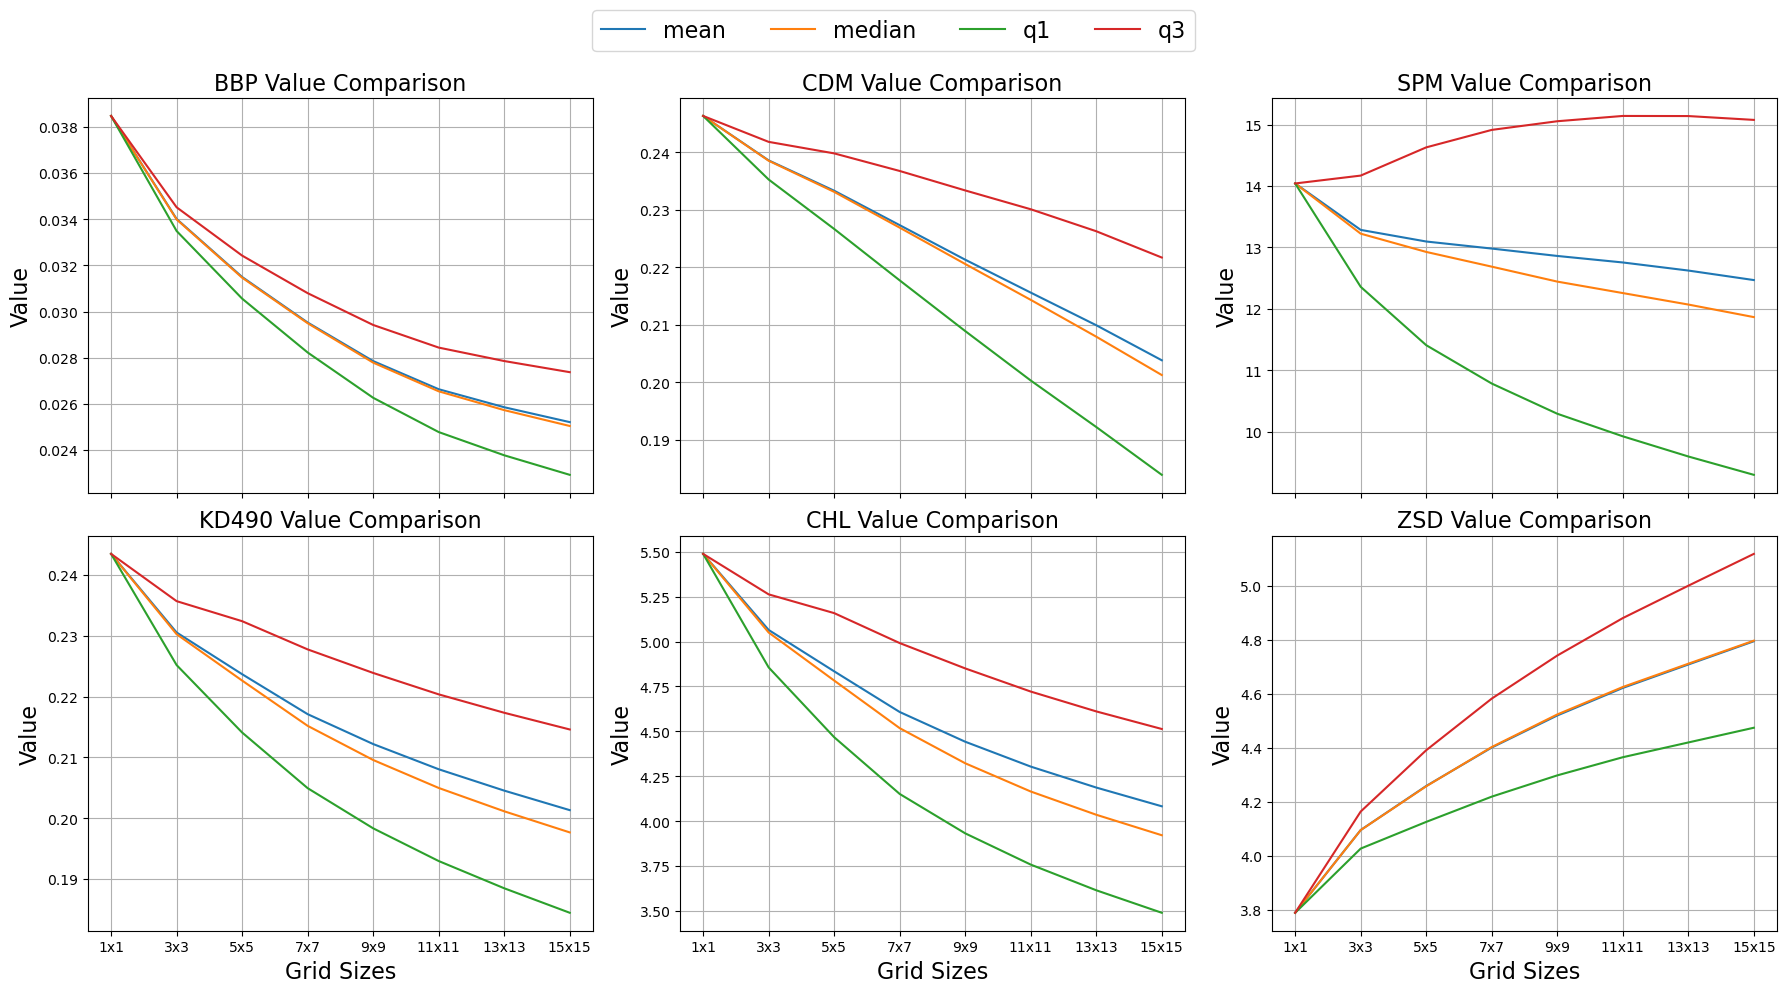

In [35]:
features = ['BBP', 'CDM', 'SPM', 'KD490', 'CHL', 'ZSD']
sizes = ['1x1', '3x3', '5x5', '7x7', '9x9', '11x11', '13x13', '15x15']
statistics = ['mean', 'median', 'q1', 'q3']

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

for ax, feature in zip(axs.ravel(), features):
    
    for statistic in statistics:
        columns = [f'{feature}_{res}_{statistic}' for res in sizes]
        feature_na[columns].mean().plot(ax=ax, label=statistic) 
        
    ax.set_title(f'{feature} Value Comparison', fontsize=16)
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes, rotation=0)
    ax.set_ylabel('Value', fontsize=16)
    ax.set_xlabel('Grid Sizes', fontsize=16)
    ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, statistics, ncol=4, loc='upper center', fontsize=16)  

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Feature Dataset filled with Neg

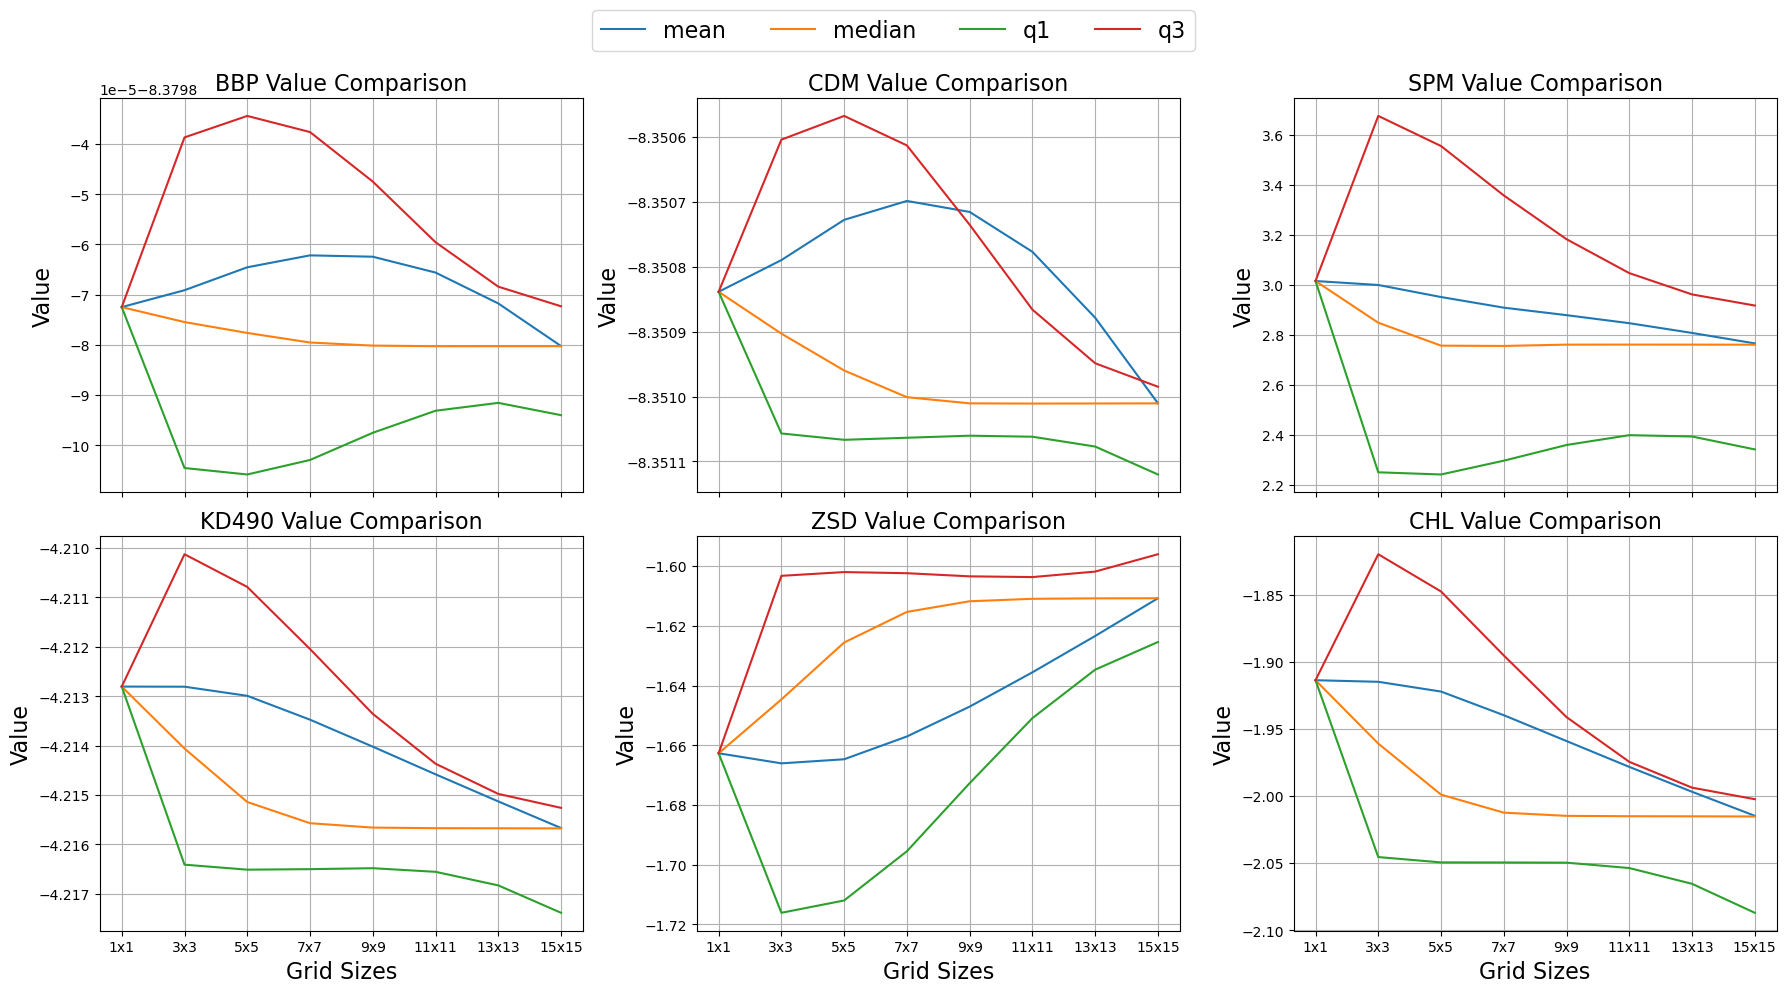

In [27]:
features = ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']
sizes = ['1x1', '3x3', '5x5', '7x7', '9x9', '11x11', '13x13', '15x15']
statistics = ['mean', 'median', 'q1', 'q3']

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

for ax, feature in zip(axs.ravel(), features):
    
    for statistic in statistics:
        columns = [f'{feature}_{res}_{statistic}' for res in sizes]
        feature_neg[columns].mean().plot(ax=ax, label=statistic) 
        
    ax.set_title(f'{feature} Value Comparison', fontsize=16)
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes, rotation=0)
    ax.set_ylabel('Value', fontsize=16)
    ax.set_xlabel('Grid Sizes', fontsize=16)
    ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, statistics, ncol=4, loc='upper center', fontsize=16)  

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [6]:
data = []

for col in feature_neg.columns:
    if col not in ['time', 'site']:
        feat, size_stat = col.split('_')[0], '_'.join(col.split('_')[1:])
        size, statistic = size_stat.split('_')[0], '_'.join(size_stat.split('_')[1:])
        
        mean_value = feature_neg[col].mean()

        data.append([feat, size, statistic, mean_value])

feature_mean_neg = pd.DataFrame(data, columns=['feature', 'size', 'statistics', 'mean'])
feature_mean_neg

feature   size statistics      mean
0       BBP    1x1     median -8.379872
1       CDM    1x1     median -8.350839
2       SPM    1x1     median  3.014654
3     KD490    1x1     median -4.212805
4       ZSD    1x1     median -1.662674
..      ...    ...        ...       ...
187     CDM  15x15         q3 -8.350985
188     SPM  15x15         q3  2.916493
189   KD490  15x15         q3 -4.215261
190     ZSD  15x15         q3 -1.596026
191     CHL  15x15         q3 -2.002372

[192 rows x 4 columns]

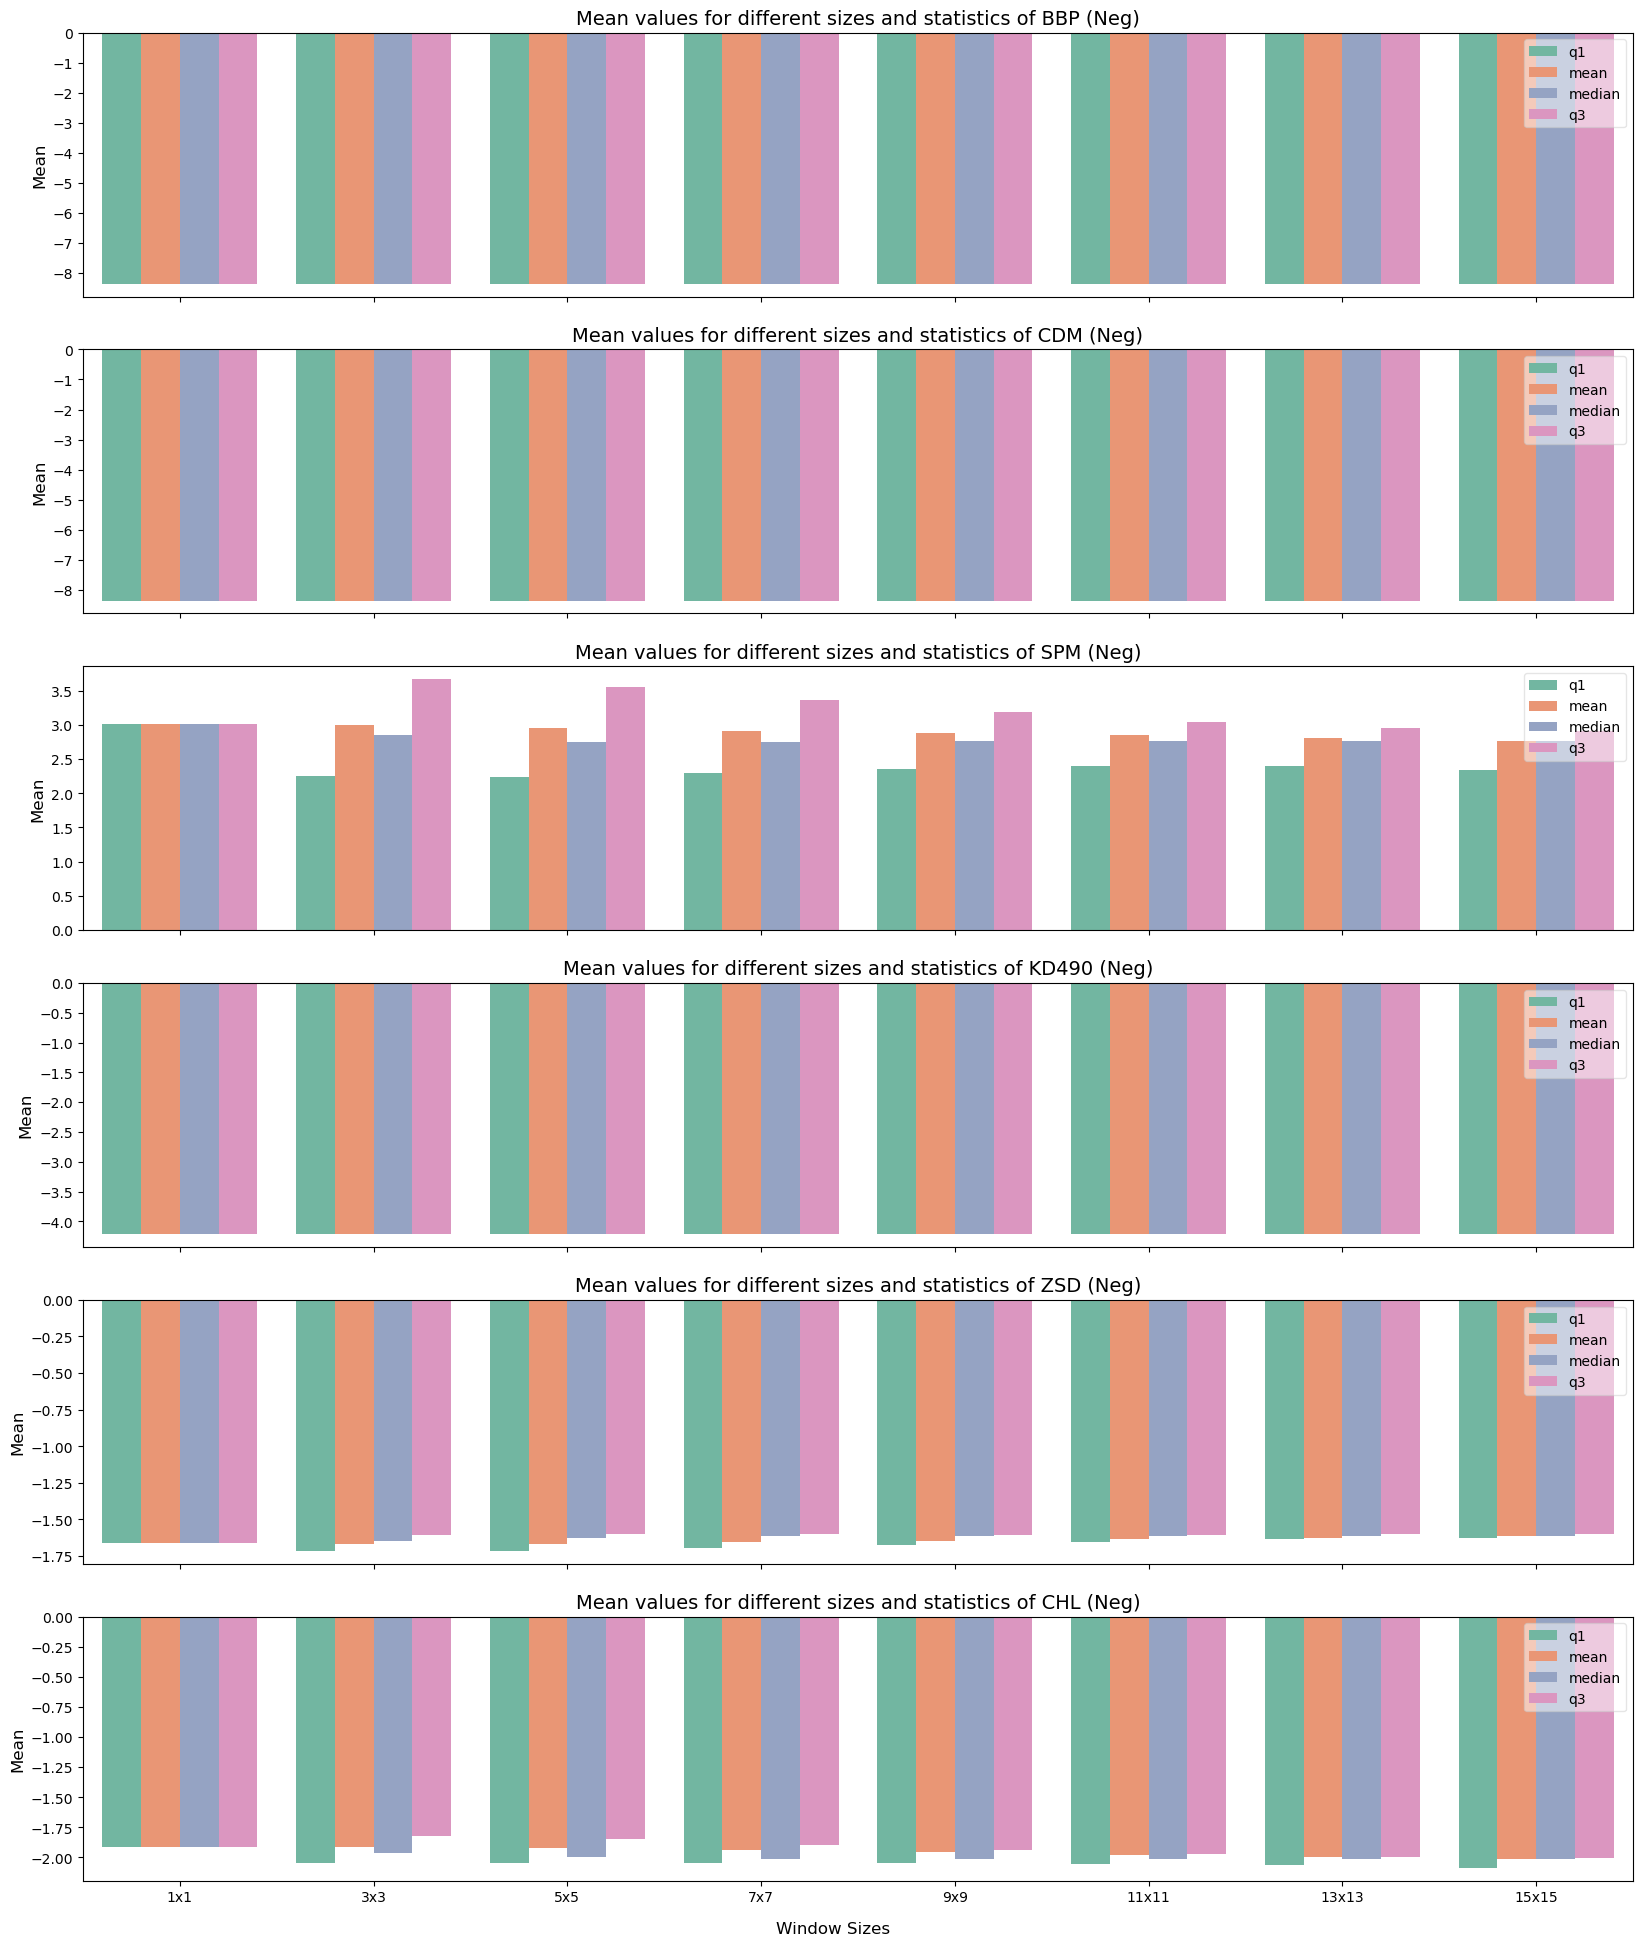

In [7]:
features = feature_mean_neg['feature'].unique()
feature_mean_neg['size_num'] = feature_mean_neg['size'].apply(lambda size_str: int(size_str.split('x')[0]))

sns.set_palette("Set2")

fig, axs = plt.subplots(len(features), 1, figsize=(20, 4 * len(features)), sharex=True)

for idx, feat in enumerate(features):
    feat_data = feature_mean_neg[feature_mean_neg['feature'] == feat].sort_values('size_num')

    sns.barplot(x='size', y='mean', hue='statistics', data=feat_data, ax=axs[idx],
                hue_order=['q1', 'mean', 'median', 'q3'])

    axs[idx].set_title(f'Mean values for different sizes and statistics of {feat} (Neg)', fontsize=14)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('Mean', fontsize=12)
    axs[idx].legend(loc='upper right',framealpha=0.5)

fig.text(0.5, 0.09, 'Window Sizes', ha='center', va='center', fontsize=12)

plt.show()

### Feature Dataset filled with Zero

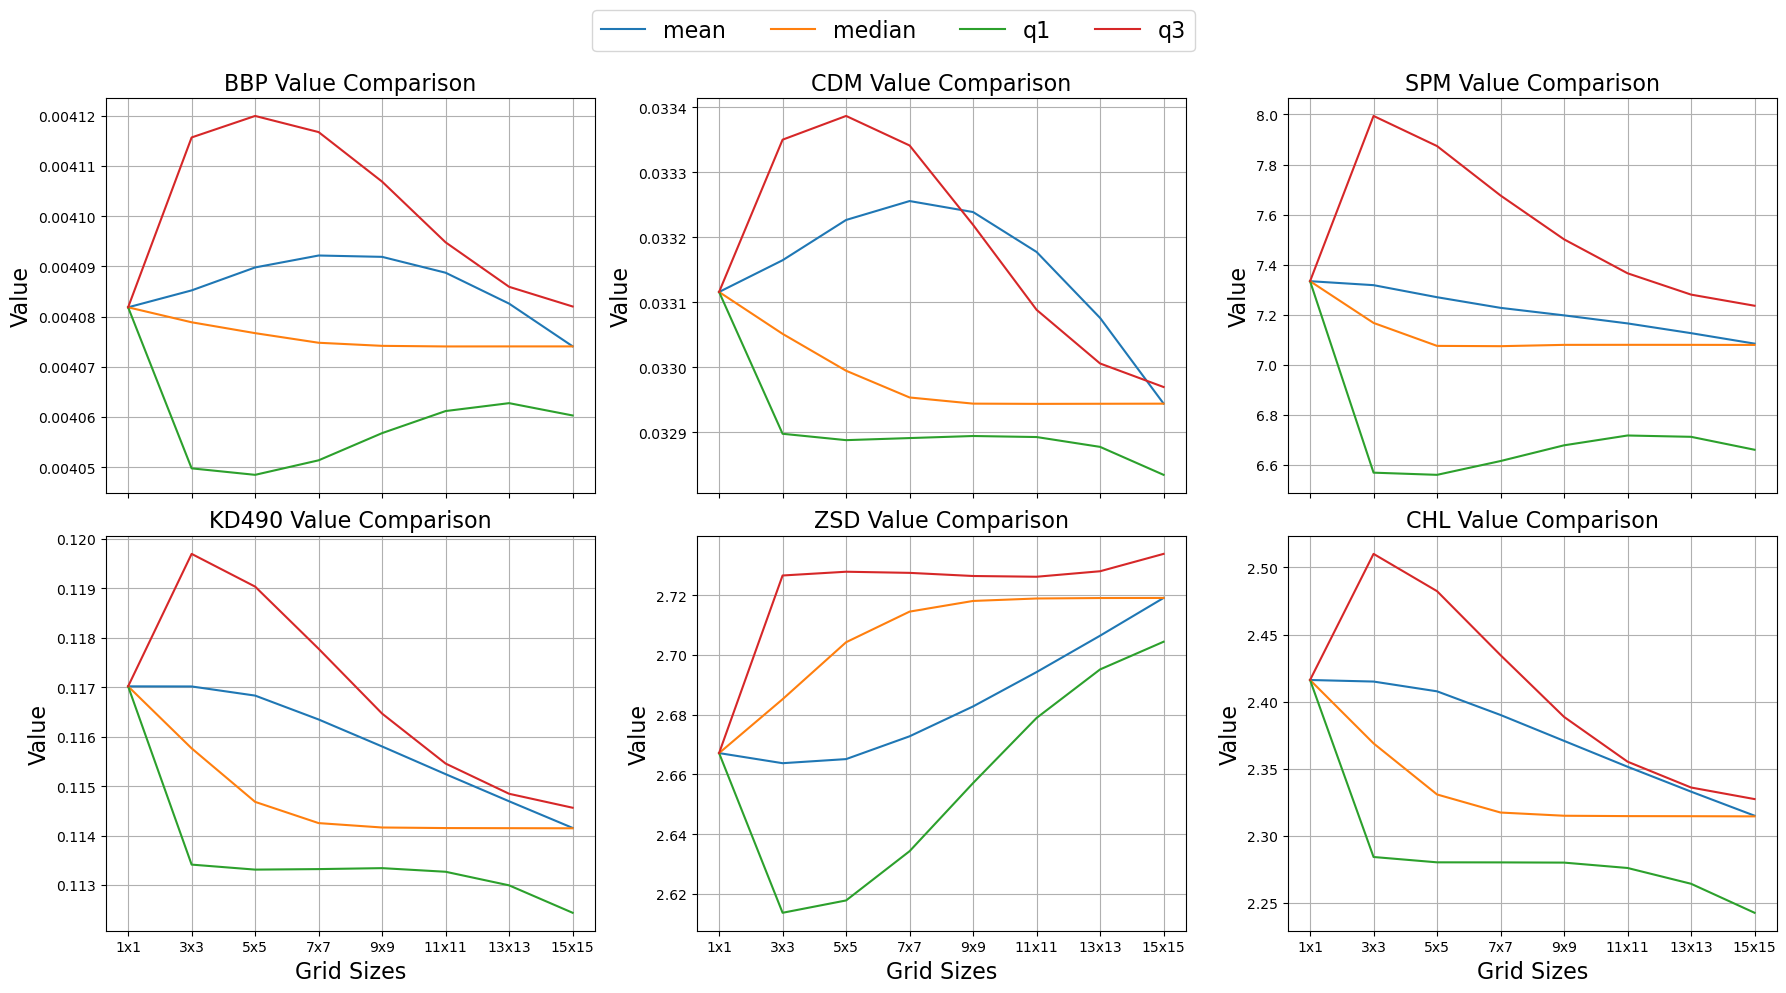

In [28]:
features = ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']
sizes = ['1x1', '3x3', '5x5', '7x7', '9x9', '11x11', '13x13', '15x15']
statistics = ['mean', 'median', 'q1', 'q3']

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

for ax, feature in zip(axs.ravel(), features):
    
    for statistic in statistics:
        columns = [f'{feature}_{res}_{statistic}' for res in sizes]
        feature_zero[columns].mean().plot(ax=ax, label=statistic) 
        
    ax.set_title(f'{feature} Value Comparison', fontsize=16)
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes, rotation=0)
    ax.set_ylabel('Value', fontsize=16)
    ax.set_xlabel('Grid Sizes', fontsize=16)
    ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, statistics, ncol=4, loc='upper center', fontsize=16)  

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [9]:
data = []

for col in feature_zero.columns:
    if col not in ['time', 'site']:
        feat, size_stat = col.split('_')[0], '_'.join(col.split('_')[1:])
        size, statistic = size_stat.split('_')[0], '_'.join(size_stat.split('_')[1:])
        
        mean_value = feature_zero[col].mean()

        data.append([feat, size, statistic, mean_value])

feature_mean_zero = pd.DataFrame(data, columns=['feature', 'size', 'statistics', 'mean'])
feature_mean_zero

feature   size statistics      mean
0       BBP    1x1     median  0.004082
1       CDM    1x1     median  0.033116
2       SPM    1x1     median  7.333551
3     KD490    1x1     median  0.117020
4       ZSD    1x1     median  2.667152
..      ...    ...        ...       ...
187     CDM  15x15         q3  0.032970
188     SPM  15x15         q3  7.235390
189   KD490  15x15         q3  0.114564
190     ZSD  15x15         q3  2.733800
191     CHL  15x15         q3  2.327453

[192 rows x 4 columns]

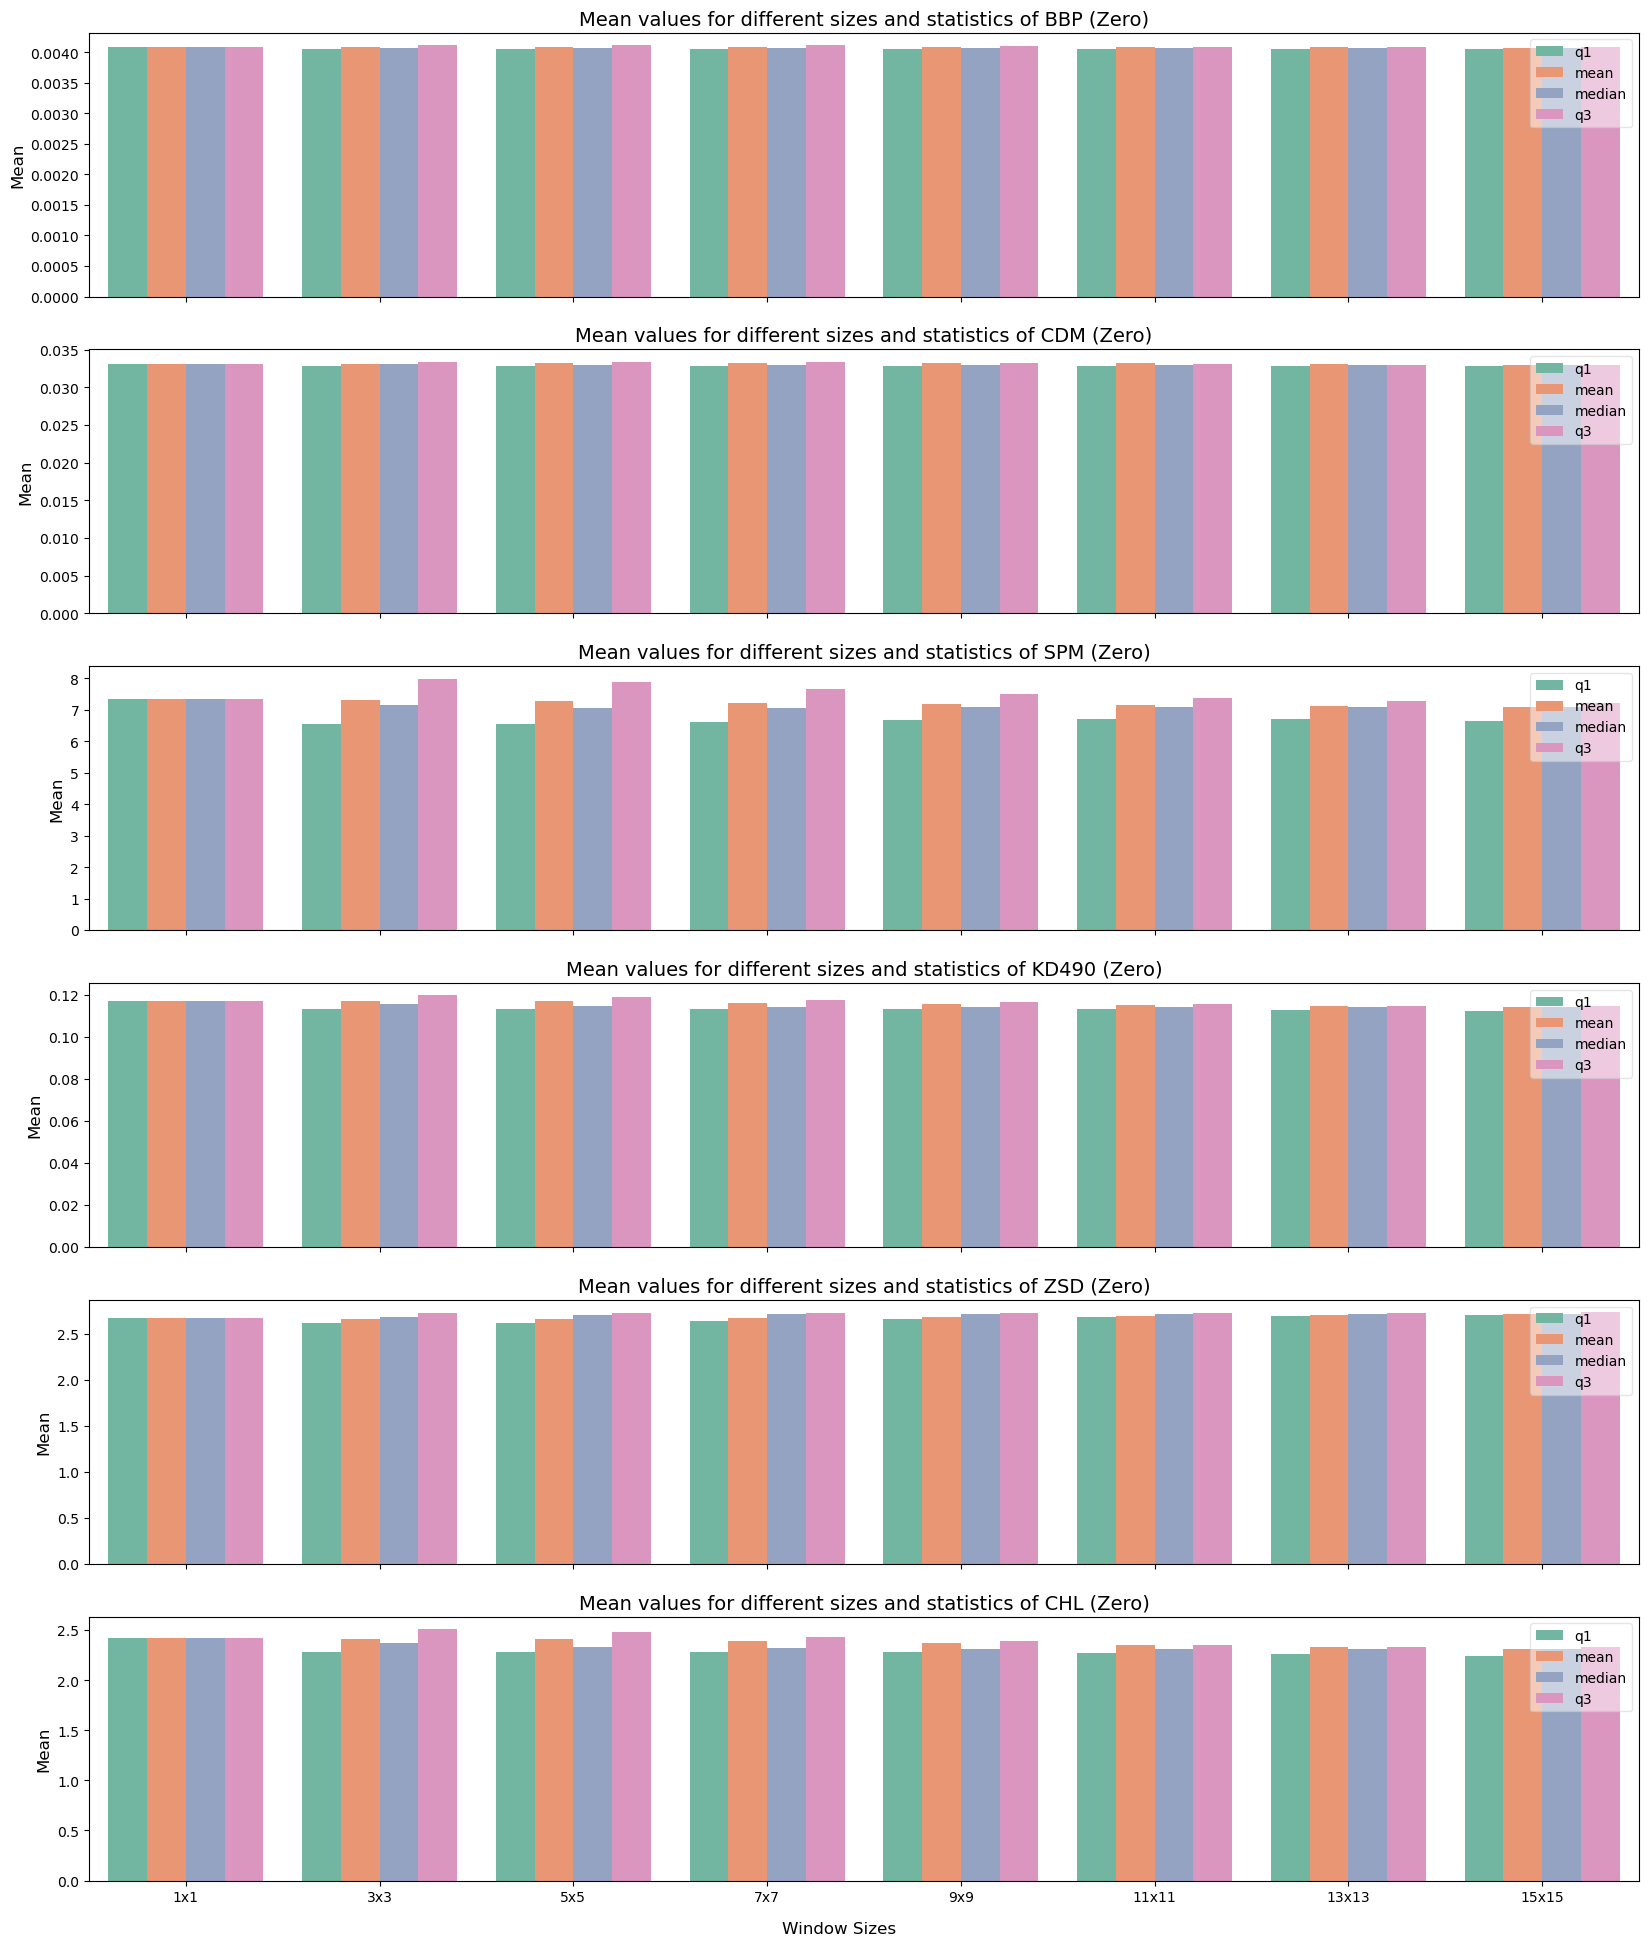

In [10]:
features = feature_mean_zero['feature'].unique()
feature_mean_zero['size_num'] = feature_mean_zero['size'].apply(lambda size_str: int(size_str.split('x')[0]))

sns.set_palette("Set2")

fig, axs = plt.subplots(len(features), 1, figsize=(20, 4 * len(features)), sharex=True)

for idx, feat in enumerate(features):
    feat_data = feature_mean_zero[feature_mean_zero['feature'] == feat].sort_values('size_num')

    sns.barplot(x='size', y='mean', hue='statistics', data=feat_data, ax=axs[idx],
                hue_order=['q1', 'mean', 'median', 'q3'])

    axs[idx].set_title(f'Mean values for different sizes and statistics of {feat} (Zero)', fontsize=14)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('Mean', fontsize=12)
    axs[idx].legend(loc='upper right',framealpha=0.5)

fig.text(0.5, 0.09, 'Window Sizes', ha='center', va='center', fontsize=12)

plt.show()

# RiskLevelLabel vs. 6 Features

#### Feature Dataset without filling Missing Value

In [36]:
df = pd.merge(riskforecasting, feature_na, on=['site','time'])
df

site        time  riskLevelLabel  BBP_1x1_median  \
0       ukc1101-06000  2020-05-14               0             NaN   
1       ukc1101-06000  2020-05-15               0             NaN   
2       ukc1101-06000  2020-05-16               0             NaN   
3       ukc1101-06000  2020-05-17               0             NaN   
4       ukc1101-06000  2020-05-18               0             NaN   
...               ...         ...             ...             ...   
187106  ukk4307-33900  2022-09-26               0             NaN   
187107  ukk4307-33900  2022-09-27               0             NaN   
187108  ukk4307-33900  2022-09-28               0             NaN   
187109  ukk4307-33900  2022-09-29               0             NaN   
187110  ukk4307-33900  2022-09-30               0             NaN   

        CDM_1x1_median  SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
0                  NaN        9.016005               NaN             NaN   
1                  NaN             NaN               NaN             NaN   
2                  NaN             NaN               NaN             NaN   
3                  NaN             NaN               NaN             NaN   
4                  NaN             NaN               NaN             NaN   
...                ...             ...               ...             ...   
187106             NaN             NaN               NaN             NaN   
187107             NaN             NaN               NaN             NaN   
187108             NaN             NaN               NaN             NaN   
187109             NaN             NaN               NaN             NaN   
187110             NaN             NaN               NaN             NaN   

        CHL_1x1_median  BBP_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0                  NaN           NaN  ...      4.633350        0.658758   
1                  NaN           NaN  ...      8.102808        0.389522   
2                  NaN           NaN  ...      0.951647        0.255377   
3                  NaN           NaN  ...           NaN             NaN   
4                  NaN           NaN  ...           NaN             NaN   
...                ...           ...  ...           ...             ...   
187106             NaN           NaN  ...      5.116745        0.182074   
187107             NaN           NaN  ...           NaN             NaN   
187108             NaN           NaN  ...      4.906127        0.142193   
187109             NaN           NaN  ...      7.659460        0.148248   
187110             NaN           NaN  ...           NaN             NaN   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0           1.337249     23.402420      0.014399      0.648437      6.829493   
1           1.773775     10.416777           NaN           NaN      8.102808   
2           2.511375      5.363088           NaN           NaN      1.347192   
3                NaN           NaN           NaN           NaN           NaN   
4                NaN           NaN           NaN           NaN           NaN   
...              ...           ...           ...           ...           ...   
187106      3.801842      3.106306           NaN           NaN      7.625628   
187107           NaN           NaN           NaN           NaN           NaN   
187108      5.212851      2.060148           NaN           NaN      4.906127   
187109      4.761873      2.209768           NaN           NaN     11.234165   
187110           NaN           NaN           NaN           NaN           NaN   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0             0.782075      1.376949     30.399586  
1             0.394867      1.792657     10.639543  
2             0.270816      2.670747      5.887294  
3                  NaN           NaN           NaN  
4                  NaN           NaN           NaN  
...                ...           ...           ...  
187106        0.186561      3.910818      

In [46]:
# Pearson Correlation
df_corr_pearson = df.corr(method='pearson')
df_corr_pearson

/var/folders/r5/x64ktbgx58365__7s6m8nvqh0000gn/T/ipykernel_8191/3905183258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_pearson = df.corr(method='pearson')


riskLevelLabel  BBP_1x1_median  CDM_1x1_median  \
riskLevelLabel          1.000000        0.023234       -0.028825   
BBP_1x1_median          0.023234        1.000000        0.442687   
CDM_1x1_median         -0.028825        0.442687        1.000000   
SPM_1x1_median          0.066840        0.644808        0.251321   
KD490_1x1_median       -0.000384        0.228880        0.523927   
...                          ...             ...             ...   
CDM_15x15_q3           -0.005227        0.530433        0.932158   
SPM_15x15_q3            0.052276        0.740190        0.324632   
KD490_15x15_q3         -0.003136        0.453945        0.694140   
ZSD_15x15_q3           -0.011741       -0.605691       -0.590768   
CHL_15x15_q3           -0.006223        0.414199        0.690537   

                  SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
riskLevelLabel          0.066840         -0.000384       -0.008368   
BBP_1x1_median          0.644808          0.228880       -0.401030   
CDM_1x1_median          0.251321          0.523927       -0.539502   
SPM_1x1_median          1.000000          0.147231       -0.234277   
KD490_1x1_median        0.147231          1.000000       -0.683170   
...                          ...               ...             ...   
CDM_15x15_q3            0.215140          0.489008       -0.466997   
SPM_15x15_q3            0.854747          0.163730       -0.263703   
KD490_15x15_q3          0.214475          0.867141       -0.685409   
ZSD_15x15_q3           -0.301975         -0.579336        0.895919   
CHL_15x15_q3            0.168527          0.843522       -0.567667   

                  CHL_1x1_median  BBP_1x1_mean  CDM_1x1_mean  SPM_1x1_mean  \
riskLevelLabel         -0.005257      0.023234     -0.028825      0.066840   
BBP_1x1_median          0.154568      1.000000      0.442687      0.644808   
CDM_1x1_median          0.458997      0.442687      1.000000      0.251321   
SPM_1x1_median          0.097722      0.644808      0.251321      1.000000   
KD490_1x1_median        0.977846      0.228880      0.523927      0.147231   
...                          ...           ...           ...           ...   
CDM_15x15_q3            0.430054      0.530433      0.932158      0.215140   
SPM_15x15_q3            0.104986      0.740190      0.324632      0.854747   
KD490_15x15_q3          0.809023      0.453945      0.694140      0.214475   
ZSD_15x15_q3           -0.452038     -0.605691     -0.590768     -0.301975   
CHL_15x15_q3            0.817461      0.414199      0.690537      0.168527   

                  ...  SPM_15x15_q1  KD490_15x15_q1  ZSD_15x15_q1  \
riskLevelLabel    ...      0.044465        0.013619     -0.002485   
BBP_1x1_median    ...      0.764030        0.611526     -0.499363   
CDM_1x1_median    ...      0.294594        0.700994     -0.581087   
SPM_1x1_median    ...      0.832782        0.316486     -0.259173   
KD490_1x1_median  ...      0.136009        0.717370     -0.649136   
...               ...           ...             ...           ...   
CDM_15x15_q3      ...      0.252222        0.750690     -0.536083   
SPM_15x15_q3      ...      0.912599        0.407984     -0.318372   
KD490_15x15_q3    ...      0.259322        0.916665     -0.743509   
ZSD_15x15_q3      ...     -0.312989       -0.788844      0.962607   
CHL_15x15_q3      ...      0.208729        0.874355     -0.617473   

                  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
riskLevelLabel        0.010553      0.030468     -0.005227      0.052276   
BBP_1x1_median        0.582859      0.954604      0.530433      0.740190   
CDM_1x1_median        0.704040      0.457405      0.932158      0.324632   
SPM_1x1_median        0.277542      0.618269      0.215140      0.854747   
KD490_1x1_median      0.699413      0.154410      0.489008      0.163730   
...                        ...           ...           ...           ...   
CDM_15x15_q3          0.735315      0.490769      1.000000    

In [47]:
# Kendall Correlation
df_corr_kendall = df.corr(method='kendall')
df_corr_kendall

/var/folders/r5/x64ktbgx58365__7s6m8nvqh0000gn/T/ipykernel_8191/1347970539.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_kendall = df.corr(method='kendall')


riskLevelLabel  BBP_1x1_median  CDM_1x1_median  \
riskLevelLabel          1.000000        0.021490       -0.020049   
BBP_1x1_median          0.021490        1.000000        0.396998   
CDM_1x1_median         -0.020049        0.396998        1.000000   
SPM_1x1_median          0.045314        0.734346        0.374906   
KD490_1x1_median        0.012660        0.278239        0.473181   
...                          ...             ...             ...   
CDM_15x15_q3           -0.001674        0.447532        0.827747   
SPM_15x15_q3            0.045110        0.767920        0.391707   
KD490_15x15_q3          0.004606        0.380034        0.516357   
ZSD_15x15_q3           -0.015641       -0.492566       -0.519702   
CHL_15x15_q3            0.004536        0.378251        0.515375   

                  SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
riskLevelLabel          0.045314          0.012660       -0.012952   
BBP_1x1_median          0.734346          0.278239       -0.279733   
CDM_1x1_median          0.374906          0.473181       -0.474965   
SPM_1x1_median          1.000000          0.337852       -0.339722   
KD490_1x1_median        0.337852          1.000000       -0.995601   
...                          ...               ...             ...   
CDM_15x15_q3            0.386512          0.468825       -0.471263   
SPM_15x15_q3            0.742992          0.330445       -0.332833   
KD490_15x15_q3          0.369326          0.815630       -0.816504   
ZSD_15x15_q3           -0.450729         -0.688115        0.690634   
CHL_15x15_q3            0.368440          0.815994       -0.816812   

                  CHL_1x1_median  BBP_1x1_mean  CDM_1x1_mean  SPM_1x1_mean  \
riskLevelLabel          0.012601      0.021490     -0.020049      0.045314   
BBP_1x1_median          0.277930      1.000000      0.396998      0.734346   
CDM_1x1_median          0.472929      0.396998      1.000000      0.374906   
SPM_1x1_median          0.337444      0.734346      0.374906      1.000000   
KD490_1x1_median        0.999096      0.278239      0.473181      0.337852   
...                          ...           ...           ...           ...   
CDM_15x15_q3            0.468333      0.447532      0.827747      0.386512   
SPM_15x15_q3            0.329945      0.767920      0.391707      0.742992   
KD490_15x15_q3          0.815397      0.380034      0.516357      0.369326   
ZSD_15x15_q3           -0.687580     -0.492566     -0.519702     -0.450729   
CHL_15x15_q3            0.815772      0.378251      0.515375      0.368440   

                  ...  SPM_15x15_q1  KD490_15x15_q1  ZSD_15x15_q1  \
riskLevelLabel    ...      0.042828        0.015508     -0.004923   
BBP_1x1_median    ...      0.790285        0.492296     -0.386826   
CDM_1x1_median    ...      0.382640        0.519742     -0.520219   
SPM_1x1_median    ...      0.686616        0.449776     -0.373104   
KD490_1x1_median  ...      0.302011        0.689762     -0.813798   
...               ...           ...             ...           ...   
CDM_15x15_q3      ...      0.411337        0.595384     -0.559612   
SPM_15x15_q3      ...      0.842167        0.502611     -0.424722   
KD490_15x15_q3    ...      0.383570        0.829494     -0.995084   
ZSD_15x15_q3      ...     -0.478655       -0.997756      0.831818   
CHL_15x15_q3      ...      0.382761        0.828528     -0.993960   

                  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
riskLevelLabel        0.015477      0.030596     -0.001674      0.045110   
BBP_1x1_median        0.492259      0.848156      0.447532      0.767920   
CDM_1x1_median        0.519783      0.404731      0.827747      0.391707   
SPM_1x1_median        0.449556      0.613724      0.386512      0.742992   
KD490_1x1_median      0.690169      0.242092      0.468825      0.330445   
...                        ...           ...           ...           ...   
CDM_15x15_q3          0.595269      0.437353      1.000000    

In [77]:
df_corr_pearson.sort_values(by="riskLevelLabel")

riskLevelLabel  BBP_1x1_median  CDM_1x1_median  \
CDM_1x1_q1           -0.028825        0.442687        1.000000   
CDM_1x1_median       -0.028825        0.442687        1.000000   
CDM_1x1_mean         -0.028825        0.442687        1.000000   
CDM_1x1_q3           -0.028825        0.442687        1.000000   
CDM_3x3_q3           -0.021873        0.440669        0.996679   
...                        ...             ...             ...   
SPM_1x1_q3            0.066840        0.644808        0.251321   
SPM_1x1_mean          0.066840        0.644808        0.251321   
SPM_1x1_median        0.066840        0.644808        0.251321   
SPM_1x1_q1            0.066840        0.644808        0.251321   
riskLevelLabel        1.000000        0.023234       -0.028825   

                SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
CDM_1x1_q1            0.251321          0.523927       -0.539502   
CDM_1x1_median        0.251321          0.523927       -0.539502   
CDM_1x1_mean          0.251321          0.523927       -0.539502   
CDM_1x1_q3            0.251321          0.523927       -0.539502   
CDM_3x3_q3            0.244219          0.477169       -0.512947   
...                        ...               ...             ...   
SPM_1x1_q3            1.000000          0.147231       -0.234277   
SPM_1x1_mean          1.000000          0.147231       -0.234277   
SPM_1x1_median        1.000000          0.147231       -0.234277   
SPM_1x1_q1            1.000000          0.147231       -0.234277   
riskLevelLabel        0.066840         -0.000384       -0.008368   

                CHL_1x1_median  BBP_1x1_mean  CDM_1x1_mean  SPM_1x1_mean  \
CDM_1x1_q1            0.458997      0.442687      1.000000      0.251321   
CDM_1x1_median        0.458997      0.442687      1.000000      0.251321   
CDM_1x1_mean          0.458997      0.442687      1.000000      0.251321   
CDM_1x1_q3            0.458997      0.442687      1.000000      0.251321   
CDM_3x3_q3            0.391058      0.440669      0.996679      0.244219   
...                        ...           ...           ...           ...   
SPM_1x1_q3            0.097722      0.644808      0.251321      1.000000   
SPM_1x1_mean          0.097722      0.644808      0.251321      1.000000   
SPM_1x1_median        0.097722      0.644808      0.251321      1.000000   
SPM_1x1_q1            0.097722      0.644808      0.251321      1.000000   
riskLevelLabel       -0.005257      0.023234     -0.028825      0.066840   

                KD490_1x1_mean  ZSD_1x1_mean  CHL_1x1_mean  BBP_1x1_q1  \
CDM_1x1_q1            0.523927     -0.539502      0.458997    0.442687   
CDM_1x1_median        0.523927     -0.539502      0.458997    0.442687   
CDM_1x1_mean          0.523927     -0.539502      0.458997    0.442687   
CDM_1x1_q3            0.523927     -0.539502      0.458997    0.442687   
CDM_3x3_q3            0.477169     -0.512947      0.391058    0.440669   
...                        ...           ...           ...         ...   
SPM_1x1_q3            0.147231     -0.234277      0.097722    0.644808   
SPM_1x1_mean          0.147231     -0.234277      0.097722    0.644808   
SPM_1x1_median        0.147231     -0.234277      0.097722    0.644808   
SPM_1x1_q1            0.147231     -0.234277      0.097722    0.644808   
riskLevelLabel       -0.000384     -0.008368     -0.005257    0.023234   

                CDM_1x1_q1  SPM_1x1_q1  KD490_1x1_q1  ZSD_1x1_q1  CHL_1x1_q1  \
CDM_1x1_q1        1.000000    0.251321      0.523927   -0.539502    0.458997   
CDM_1x1_median    1.000000    0.251321      0.523927   -0.539502    0.458997   
CDM_1x1_mean      1.000000    0.251321      0.523927   -0.539502    0.458997   
CDM_1x1_q3        1.000000    0.251321      0.523927   -0.539502    0.458997   
CDM_3x3_q3        0.996679    0.244219      0.477169   -0.512947    0.391058   
...                    ...         ...           ...         ...         ...   
SPM_1x1_q3        0.251321    1.000000      

In [75]:
df_corr_kendall.sort_values(by="riskLevelLabel")

riskLevelLabel  BBP_1x1_median  CDM_1x1_median  \
CDM_1x1_median       -0.020049        0.396998        1.000000   
CDM_1x1_q3           -0.020049        0.396998        1.000000   
CDM_1x1_mean         -0.020049        0.396998        1.000000   
CDM_1x1_q1           -0.020049        0.396998        1.000000   
ZSD_15x15_q3         -0.015641       -0.492566       -0.519702   
...                        ...             ...             ...   
SPM_7x7_median        0.048769        0.795306        0.383997   
SPM_3x3_q1            0.048959        0.770036        0.384470   
SPM_5x5_median        0.048996        0.779917        0.384770   
SPM_5x5_q1            0.049512        0.796971        0.382692   
riskLevelLabel        1.000000        0.021490       -0.020049   

                SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
CDM_1x1_median        0.374906          0.473181       -0.474965   
CDM_1x1_q3            0.374906          0.473181       -0.474965   
CDM_1x1_mean          0.374906          0.473181       -0.474965   
CDM_1x1_q1            0.374906          0.473181       -0.474965   
ZSD_15x15_q3         -0.450729         -0.688115        0.690634   
...                        ...               ...             ...   
SPM_7x7_median        0.824554          0.331807       -0.334192   
SPM_3x3_q1            0.915677          0.336140       -0.338396   
SPM_5x5_median        0.880030          0.337364       -0.339664   
SPM_5x5_q1            0.843486          0.328045       -0.330411   
riskLevelLabel        0.045314          0.012660       -0.012952   

                CHL_1x1_median  BBP_1x1_mean  CDM_1x1_mean  SPM_1x1_mean  \
CDM_1x1_median        0.472929      0.396998      1.000000      0.374906   
CDM_1x1_q3            0.472929      0.396998      1.000000      0.374906   
CDM_1x1_mean          0.472929      0.396998      1.000000      0.374906   
CDM_1x1_q1            0.472929      0.396998      1.000000      0.374906   
ZSD_15x15_q3         -0.687580     -0.492566     -0.519702     -0.450729   
...                        ...           ...           ...           ...   
SPM_7x7_median        0.331310      0.795306      0.383997      0.824554   
SPM_3x3_q1            0.335668      0.770036      0.384470      0.915677   
SPM_5x5_median        0.336885      0.779917      0.384770      0.880030   
SPM_5x5_q1            0.327551      0.796971      0.382692      0.843486   
riskLevelLabel        0.012601      0.021490     -0.020049      0.045314   

                KD490_1x1_mean  ZSD_1x1_mean  CHL_1x1_mean  BBP_1x1_q1  \
CDM_1x1_median        0.473181     -0.474965      0.472929    0.396998   
CDM_1x1_q3            0.473181     -0.474965      0.472929    0.396998   
CDM_1x1_mean          0.473181     -0.474965      0.472929    0.396998   
CDM_1x1_q1            0.473181     -0.474965      0.472929    0.396998   
ZSD_15x15_q3         -0.688115      0.690634     -0.687580   -0.492566   
...                        ...           ...           ...         ...   
SPM_7x7_median        0.331807     -0.334192      0.331310    0.795306   
SPM_3x3_q1            0.336140     -0.338396      0.335668    0.770036   
SPM_5x5_median        0.337364     -0.339664      0.336885    0.779917   
SPM_5x5_q1            0.328045     -0.330411      0.327551    0.796971   
riskLevelLabel        0.012660     -0.012952      0.012601    0.021490   

                CDM_1x1_q1  SPM_1x1_q1  KD490_1x1_q1  ZSD_1x1_q1  CHL_1x1_q1  \
CDM_1x1_median    1.000000    0.374906      0.473181   -0.474965    0.472929   
CDM_1x1_q3        1.000000    0.374906      0.473181   -0.474965    0.472929   
CDM_1x1_mean      1.000000    0.374906      0.473181   -0.474965    0.472929   
CDM_1x1_q1        1.000000    0.374906      0.473181   -0.474965    0.472929   
ZSD_15x15_q3     -0.519702   -0.450729     -0.688115    0.690634   -0.687580   
...                    ...         ...           ...         ...         ...   
SPM_7x7_median    0.383997    0.824554      

In [76]:
df_corr_spearman.sort_values(by="riskLevelLabel")

riskLevelLabel  BBP_1x1_median  CDM_1x1_median  \
CDM_1x1_median       -0.024546        0.571303        1.000000   
CDM_1x1_q3           -0.024546        0.571303        1.000000   
CDM_1x1_mean         -0.024546        0.571303        1.000000   
CDM_1x1_q1           -0.024546        0.571303        1.000000   
ZSD_15x15_q3         -0.019156       -0.685780       -0.713034   
...                        ...             ...             ...   
SPM_7x7_median        0.059728        0.939854        0.553262   
SPM_3x3_q1            0.059961        0.925252        0.553888   
SPM_5x5_median        0.060005        0.931453        0.554379   
SPM_5x5_q1            0.060638        0.941600        0.552054   
riskLevelLabel        1.000000        0.026309       -0.024546   

                SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
CDM_1x1_median        0.540609          0.645942       -0.647960   
CDM_1x1_q3            0.540609          0.645942       -0.647960   
CDM_1x1_mean          0.540609          0.645942       -0.647960   
CDM_1x1_q1            0.540609          0.645942       -0.647960   
ZSD_15x15_q3         -0.633285         -0.836223        0.838893   
...                        ...               ...             ...   
SPM_7x7_median        0.946918          0.471331       -0.474870   
SPM_3x3_q1            0.983743          0.480251       -0.483569   
SPM_5x5_median        0.972943          0.480870       -0.484248   
SPM_5x5_q1            0.954097          0.467239       -0.470745   
riskLevelLabel        0.055497          0.015505       -0.015863   

                CHL_1x1_median  BBP_1x1_mean  CDM_1x1_mean  SPM_1x1_mean  \
CDM_1x1_median        0.645660      0.571303      1.000000      0.540609   
CDM_1x1_q3            0.645660      0.571303      1.000000      0.540609   
CDM_1x1_mean          0.645660      0.571303      1.000000      0.540609   
CDM_1x1_q1            0.645660      0.571303      1.000000      0.540609   
ZSD_15x15_q3         -0.835675     -0.685780     -0.713034     -0.633285   
...                        ...           ...           ...           ...   
SPM_7x7_median        0.470610      0.939854      0.553262      0.946918   
SPM_3x3_q1            0.479573      0.925252      0.553888      0.983743   
SPM_5x5_median        0.480181      0.931453      0.554379      0.972943   
SPM_5x5_q1            0.466525      0.941600      0.552054      0.954097   
riskLevelLabel        0.015433      0.026309     -0.024546      0.055497   

                KD490_1x1_mean  ZSD_1x1_mean  CHL_1x1_mean  BBP_1x1_q1  \
CDM_1x1_median        0.645942     -0.647960      0.645660    0.571303   
CDM_1x1_q3            0.645942     -0.647960      0.645660    0.571303   
CDM_1x1_mean          0.645942     -0.647960      0.645660    0.571303   
CDM_1x1_q1            0.645942     -0.647960      0.645660    0.571303   
ZSD_15x15_q3         -0.836223      0.838893     -0.835675   -0.685780   
...                        ...           ...           ...         ...   
SPM_7x7_median        0.471331     -0.474870      0.470610    0.939854   
SPM_3x3_q1            0.480251     -0.483569      0.479573    0.925252   
SPM_5x5_median        0.480870     -0.484248      0.480181    0.931453   
SPM_5x5_q1            0.467239     -0.470745      0.466525    0.941600   
riskLevelLabel        0.015505     -0.015863      0.015433    0.026309   

                CDM_1x1_q1  SPM_1x1_q1  KD490_1x1_q1  ZSD_1x1_q1  CHL_1x1_q1  \
CDM_1x1_median    1.000000    0.540609      0.645942   -0.647960    0.645660   
CDM_1x1_q3        1.000000    0.540609      0.645942   -0.647960    0.645660   
CDM_1x1_mean      1.000000    0.540609      0.645942   -0.647960    0.645660   
CDM_1x1_q1        1.000000    0.540609      0.645942   -0.647960    0.645660   
ZSD_15x15_q3     -0.713034   -0.633285     -0.836223    0.838893   -0.835675   
...                    ...         ...           ...         ...         ...   
SPM_7x7_median    0.553262    0.946918      

In [48]:
# Spearman Correlation
df_corr_spearman = df.corr(method='spearman')
df_corr_spearman

/var/folders/r5/x64ktbgx58365__7s6m8nvqh0000gn/T/ipykernel_8191/243400615.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_spearman = df.corr(method='spearman')


riskLevelLabel  BBP_1x1_median  CDM_1x1_median  \
riskLevelLabel          1.000000        0.026309       -0.024546   
BBP_1x1_median          0.026309        1.000000        0.571303   
CDM_1x1_median         -0.024546        0.571303        1.000000   
SPM_1x1_median          0.055497        0.902349        0.540609   
KD490_1x1_median        0.015505        0.382899        0.645942   
...                          ...             ...             ...   
CDM_15x15_q3           -0.002051        0.640330        0.950149   
SPM_15x15_q3            0.055244        0.922184        0.561633   
KD490_15x15_q3          0.005641        0.525871        0.704271   
ZSD_15x15_q3           -0.019156       -0.685780       -0.713034   
CHL_15x15_q3            0.005556        0.523056        0.702865   

                  SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
riskLevelLabel          0.055497          0.015505       -0.015863   
BBP_1x1_median          0.902349          0.382899       -0.385232   
CDM_1x1_median          0.540609          0.645942       -0.647960   
SPM_1x1_median          1.000000          0.484242       -0.486950   
KD490_1x1_median        0.484242          1.000000       -0.999675   
...                          ...               ...             ...   
CDM_15x15_q3            0.559722          0.641012       -0.644136   
SPM_15x15_q3            0.901316          0.466048       -0.469613   
KD490_15x15_q3          0.525992          0.937559       -0.938282   
ZSD_15x15_q3           -0.633285         -0.836223        0.838893   
CHL_15x15_q3            0.524736          0.937896       -0.938590   

                  CHL_1x1_median  BBP_1x1_mean  CDM_1x1_mean  SPM_1x1_mean  \
riskLevelLabel          0.015433      0.026309     -0.024546      0.055497   
BBP_1x1_median          0.382462      1.000000      0.571303      0.902349   
CDM_1x1_median          0.645660      0.571303      1.000000      0.540609   
SPM_1x1_median          0.483659      0.902349      0.540609      1.000000   
KD490_1x1_median        0.999985      0.382899      0.645942      0.484242   
...                          ...           ...           ...           ...   
CDM_15x15_q3            0.640402      0.640330      0.950149      0.559722   
SPM_15x15_q3            0.465316      0.922184      0.561633      0.901316   
KD490_15x15_q3          0.937397      0.525871      0.704271      0.525992   
ZSD_15x15_q3           -0.835675     -0.685780     -0.713034     -0.633285   
CHL_15x15_q3            0.937739      0.523056      0.702865      0.524736   

                  ...  SPM_15x15_q1  KD490_15x15_q1  ZSD_15x15_q1  \
riskLevelLabel    ...      0.052452        0.018993     -0.006029   
BBP_1x1_median    ...      0.935007        0.685366     -0.536679   
CDM_1x1_median    ...      0.550747        0.712965     -0.709914   
SPM_1x1_median    ...      0.857232        0.632021     -0.531403   
KD490_1x1_median  ...      0.426068        0.837758     -0.935974   
...               ...           ...             ...           ...   
CDM_15x15_q3      ...      0.596029        0.787315     -0.747681   
SPM_15x15_q3      ...      0.960915        0.693783     -0.595104   
KD490_15x15_q3    ...      0.538455        0.946580     -0.999798   
ZSD_15x15_q3      ...     -0.664741       -0.999950      0.948478   
CHL_15x15_q3      ...      0.537232        0.945837     -0.999700   

                  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
riskLevelLabel        0.018956      0.037472     -0.002051      0.055244   
BBP_1x1_median        0.685272      0.961852      0.640330      0.922184   
CDM_1x1_median        0.713001      0.579088      0.950149      0.561633   
SPM_1x1_median        0.631735      0.806862      0.559722      0.901316   
KD490_1x1_median      0.838144      0.340741      0.641012      0.466048   
...                        ...           ...           ...           ...   
CDM_15x15_q3          0.787187      0.623883      1.000000    

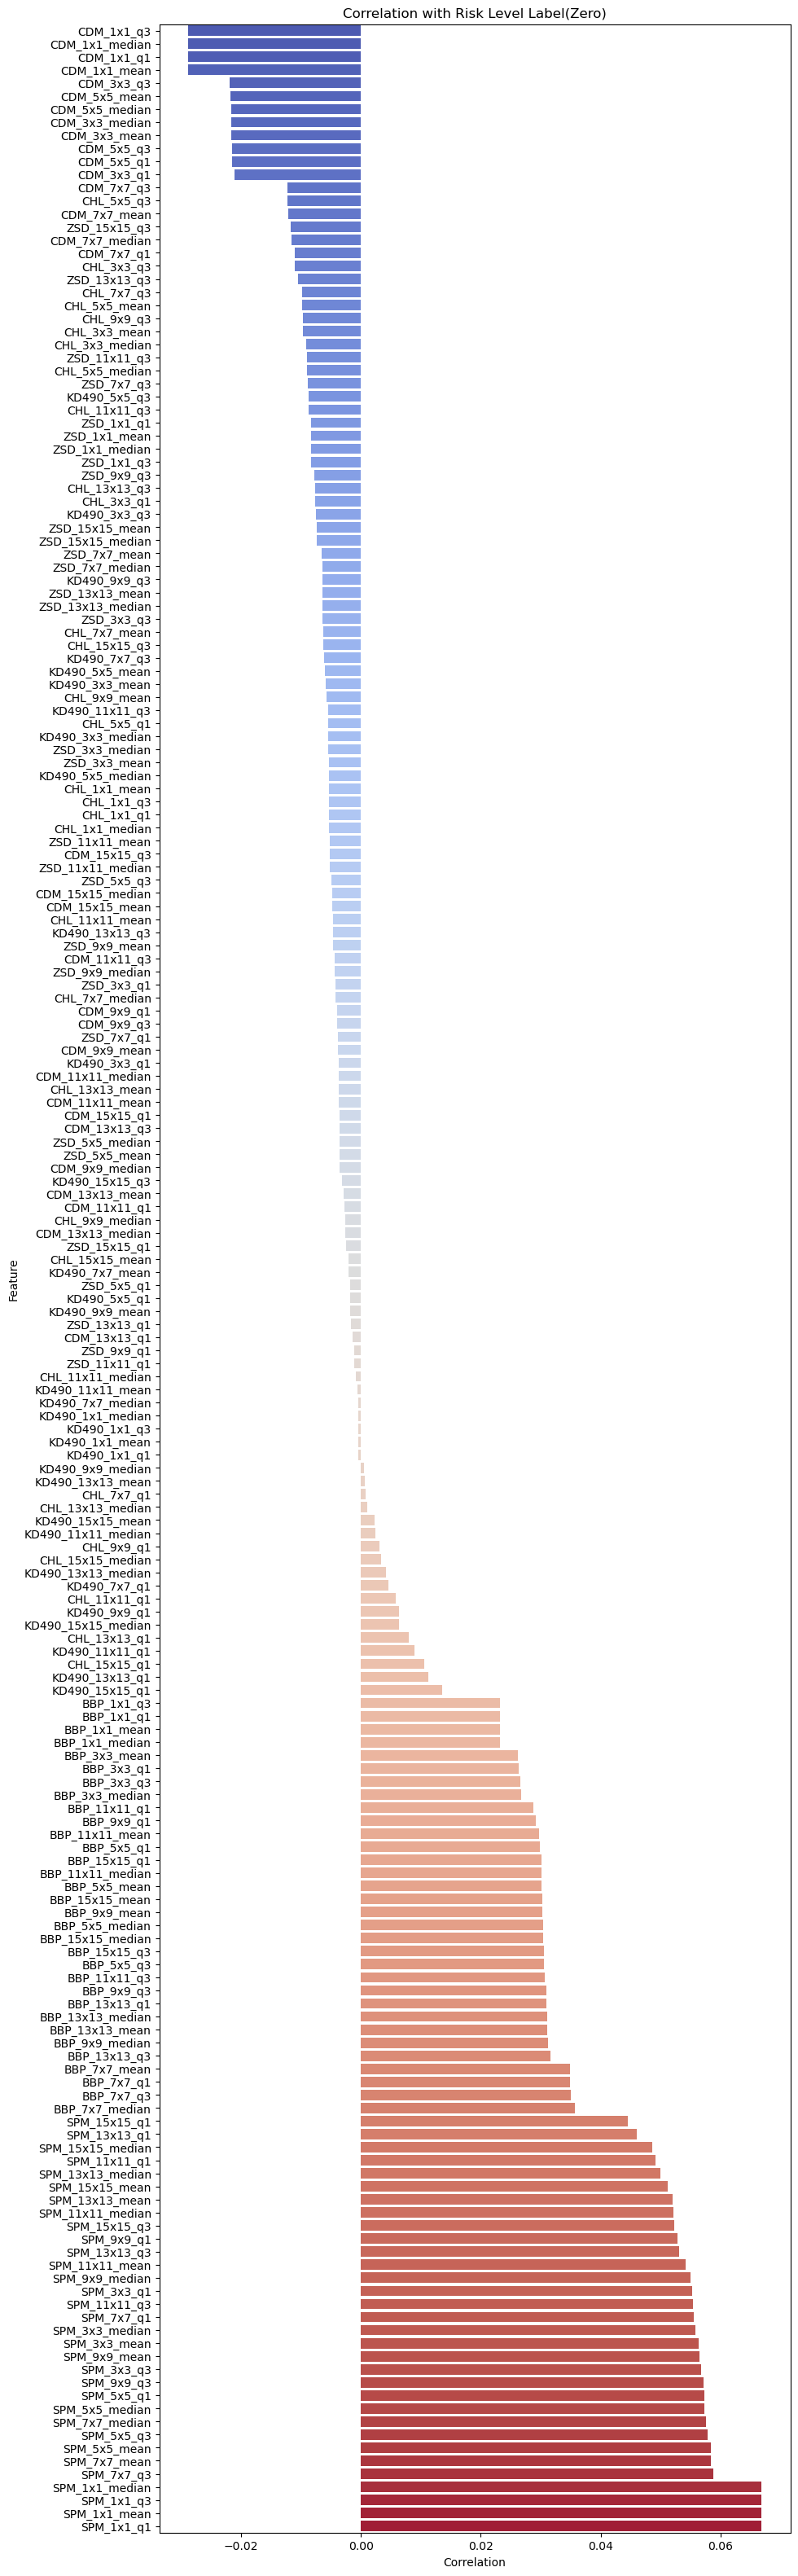

In [37]:
correlation_df = df.drop(columns=['riskLevelLabel', 'time', 'site']).corrwith(df['riskLevelLabel']).reset_index()
correlation_df.columns = ['Feature', 'Correlation']
correlation_df = correlation_df.sort_values(by='Correlation', ascending=True)

plt.figure(figsize=(10, 40))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='coolwarm')
plt.title('Correlation with Risk Level Label')
plt.show()

#### Feature Dataset filled with Neg

In [11]:
df_neg = pd.merge(riskforecasting, feature_neg, on=['site','time'])
df_neg

site        time  riskLevelLabel  BBP_1x1_median  \
0       ukc1101-06000  2020-05-14               0        0.014399   
1       ukc1101-06000  2020-05-15               0      -10.000000   
2       ukc1101-06000  2020-05-16               0      -10.000000   
3       ukc1101-06000  2020-05-17               0      -10.000000   
4       ukc1101-06000  2020-05-18               0      -10.000000   
...               ...         ...             ...             ...   
187106  ukk4307-33900  2022-09-26               0      -10.000000   
187107  ukk4307-33900  2022-09-27               0      -10.000000   
187108  ukk4307-33900  2022-09-28               0      -10.000000   
187109  ukk4307-33900  2022-09-29               0      -10.000000   
187110  ukk4307-33900  2022-09-30               0      -10.000000   

        CDM_1x1_median  SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
0             0.648437        9.016005          0.720255        1.359252   
1           -10.000000        8.102808          0.393628        1.778462   
2           -10.000000        1.135922          0.263305        2.588783   
3           -10.000000      -10.000000        -10.000000      -10.000000   
4           -10.000000      -10.000000        -10.000000      -10.000000   
...                ...             ...               ...             ...   
187106      -10.000000        7.356489          0.183889        3.869243   
187107      -10.000000      -10.000000        -10.000000      -10.000000   
187108      -10.000000        4.906127          0.142344        5.219365   
187109      -10.000000        9.181858          0.151466        4.857575   
187110      -10.000000      -10.000000        -10.000000      -10.000000   

        CHL_1x1_median  BBP_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0            26.936116      0.014399  ...      5.846387        0.720255   
1            10.588528    -10.000000  ...      8.102808        0.393628   
2             5.632908    -10.000000  ...      1.135922        0.263305   
3           -10.000000    -10.000000  ...    -10.000000      -10.000000   
4           -10.000000    -10.000000  ...    -10.000000      -10.000000   
...                ...           ...  ...           ...             ...   
187106        3.158081    -10.000000  ...      7.356489        0.183889   
187107      -10.000000    -10.000000  ...    -10.000000      -10.000000   
187108        2.063839    -10.000000  ...      4.906127        0.142344   
187109        2.291730    -10.000000  ...      9.181858        0.151466   
187110      -10.000000    -10.000000  ...    -10.000000      -10.000000   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0           1.359252     26.936116      0.014399      0.648437      5.846387   
1           1.778462     10.588528    -10.000000    -10.000000      8.102808   
2           2.588783      5.632908    -10.000000    -10.000000      1.135922   
3         -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
4         -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
...              ...           ...           ...           ...           ...   
187106      3.869243      3.158081    -10.000000    -10.000000      7.356489   
187107    -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
187108      5.219365      2.063839    -10.000000    -10.000000      4.906127   
187109      4.857575      2.291730    -10.000000    -10.000000      9.181858   
187110    -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0             0.720255      1.359252     26.936116  
1             0.393628      1.778462     10.588528  
2             0.263305      2.588783      5.632908  
3           -10.000000    -10.000000    -10.000000  
4           -10.000000    -10.000000    -10.000000  
...                ...           ...           ...  
187106        0.183889      3.869243      

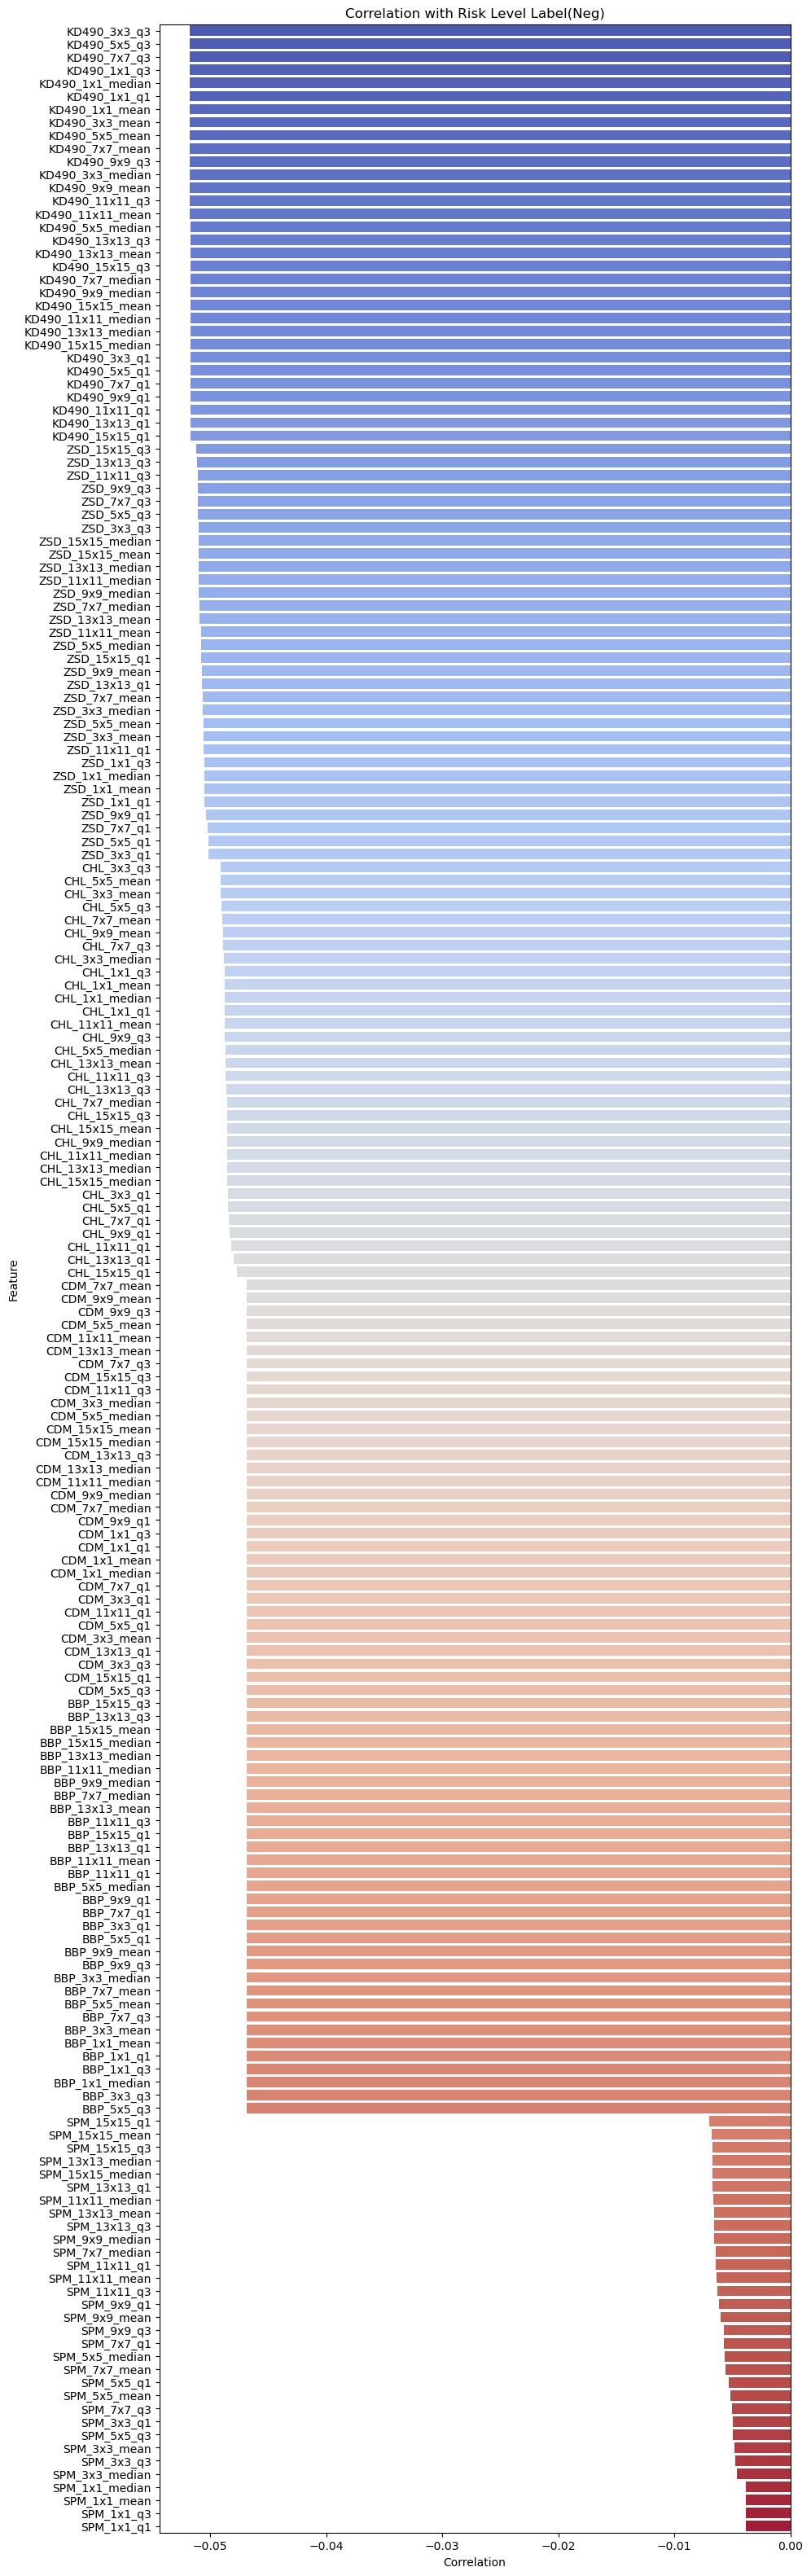

In [13]:
correlation_df_neg = df_neg.drop(columns=['riskLevelLabel', 'time', 'site']).corrwith(df_neg['riskLevelLabel']).reset_index()
correlation_df_neg.columns = ['Feature', 'Correlation']
correlation_df_neg = correlation_df_neg.sort_values(by='Correlation', ascending=True)

plt.figure(figsize=(10, 40))
sns.barplot(x='Correlation', y='Feature', data=correlation_df_neg, palette='coolwarm')
plt.title('Correlation with Risk Level Label(Neg)')
plt.show()

#### Feature Dataset filled with Zero

In [12]:
df_zero = pd.merge(riskforecasting, feature_zero, on=['site','time'])
df_zero

site        time  riskLevelLabel  BBP_1x1_median  \
0       ukc1101-06000  2020-05-14               0        0.014399   
1       ukc1101-06000  2020-05-15               0        0.000000   
2       ukc1101-06000  2020-05-16               0        0.000000   
3       ukc1101-06000  2020-05-17               0        0.000000   
4       ukc1101-06000  2020-05-18               0        0.000000   
...               ...         ...             ...             ...   
187106  ukk4307-33900  2022-09-26               0        0.000000   
187107  ukk4307-33900  2022-09-27               0        0.000000   
187108  ukk4307-33900  2022-09-28               0        0.000000   
187109  ukk4307-33900  2022-09-29               0        0.000000   
187110  ukk4307-33900  2022-09-30               0        0.000000   

        CDM_1x1_median  SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
0             0.648437        9.016005          0.720255        1.359252   
1             0.000000        8.102808          0.393628        1.778462   
2             0.000000        1.135922          0.263305        2.588783   
3             0.000000        0.000000          0.000000        0.000000   
4             0.000000        0.000000          0.000000        0.000000   
...                ...             ...               ...             ...   
187106        0.000000        7.356489          0.183889        3.869243   
187107        0.000000        0.000000          0.000000        0.000000   
187108        0.000000        4.906127          0.142344        5.219365   
187109        0.000000        9.181858          0.151466        4.857575   
187110        0.000000        0.000000          0.000000        0.000000   

        CHL_1x1_median  BBP_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0            26.936116      0.014399  ...      5.846387        0.720255   
1            10.588528      0.000000  ...      8.102808        0.393628   
2             5.632908      0.000000  ...      1.135922        0.263305   
3             0.000000      0.000000  ...      0.000000        0.000000   
4             0.000000      0.000000  ...      0.000000        0.000000   
...                ...           ...  ...           ...             ...   
187106        3.158081      0.000000  ...      7.356489        0.183889   
187107        0.000000      0.000000  ...      0.000000        0.000000   
187108        2.063839      0.000000  ...      4.906127        0.142344   
187109        2.291730      0.000000  ...      9.181858        0.151466   
187110        0.000000      0.000000  ...      0.000000        0.000000   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0           1.359252     26.936116      0.014399      0.648437      5.846387   
1           1.778462     10.588528      0.000000      0.000000      8.102808   
2           2.588783      5.632908      0.000000      0.000000      1.135922   
3           0.000000      0.000000      0.000000      0.000000      0.000000   
4           0.000000      0.000000      0.000000      0.000000      0.000000   
...              ...           ...           ...           ...           ...   
187106      3.869243      3.158081      0.000000      0.000000      7.356489   
187107      0.000000      0.000000      0.000000      0.000000      0.000000   
187108      5.219365      2.063839      0.000000      0.000000      4.906127   
187109      4.857575      2.291730      0.000000      0.000000      9.181858   
187110      0.000000      0.000000      0.000000      0.000000      0.000000   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0             0.720255      1.359252     26.936116  
1             0.393628      1.778462     10.588528  
2             0.263305      2.588783      5.632908  
3             0.000000      0.000000      0.000000  
4             0.000000      0.000000      0.000000  
...                ...           ...           ...  
187106        0.183889      3.869243      

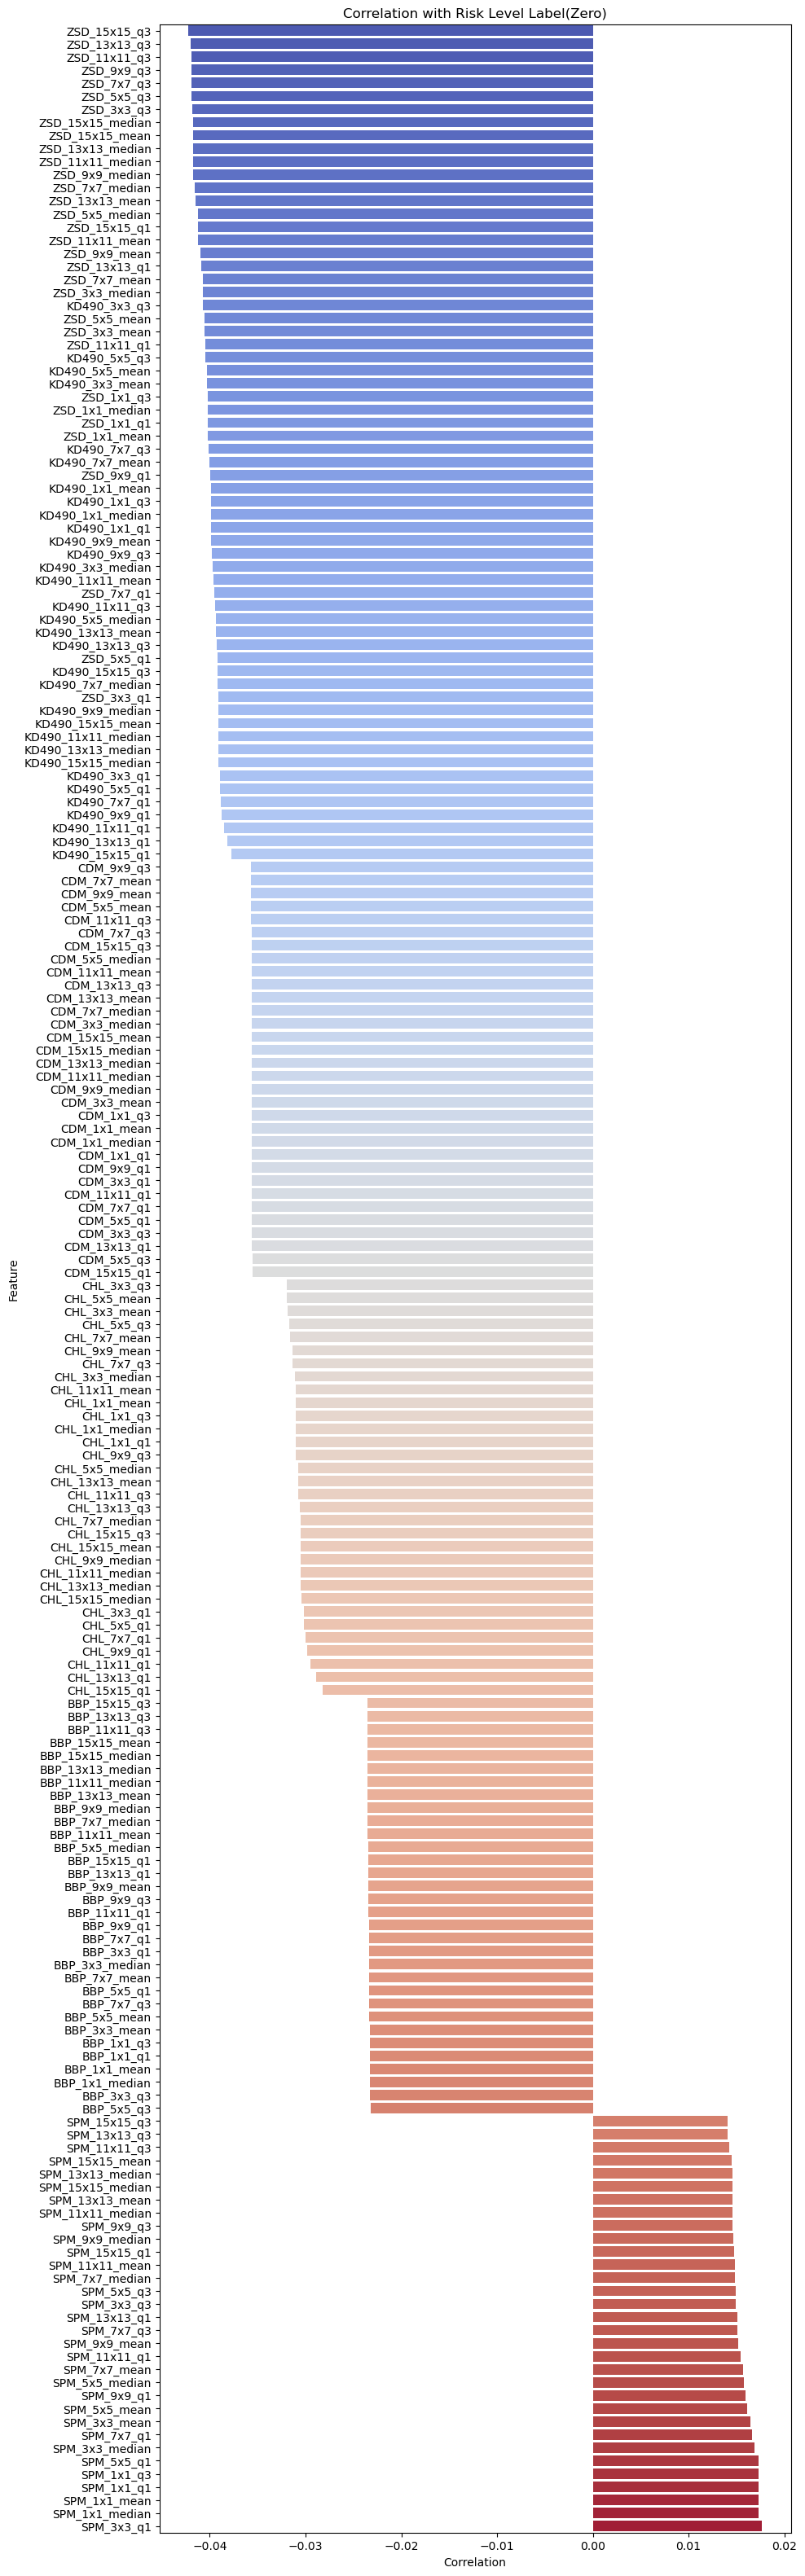

In [14]:
correlation_df_zero = df_zero.drop(columns=['riskLevelLabel', 'time', 'site']).corrwith(df_neg['riskLevelLabel']).reset_index()
correlation_df_zero.columns = ['Feature', 'Correlation']
correlation_df_zero = correlation_df_zero.sort_values(by='Correlation', ascending=True)

plt.figure(figsize=(10, 40))
sns.barplot(x='Correlation', y='Feature', data=correlation_df_zero, palette='coolwarm')
plt.title('Correlation with Risk Level Label(Zero)')
plt.show()

### 15x15 window sized mean

#### Feature Dataset without filling Missing Value

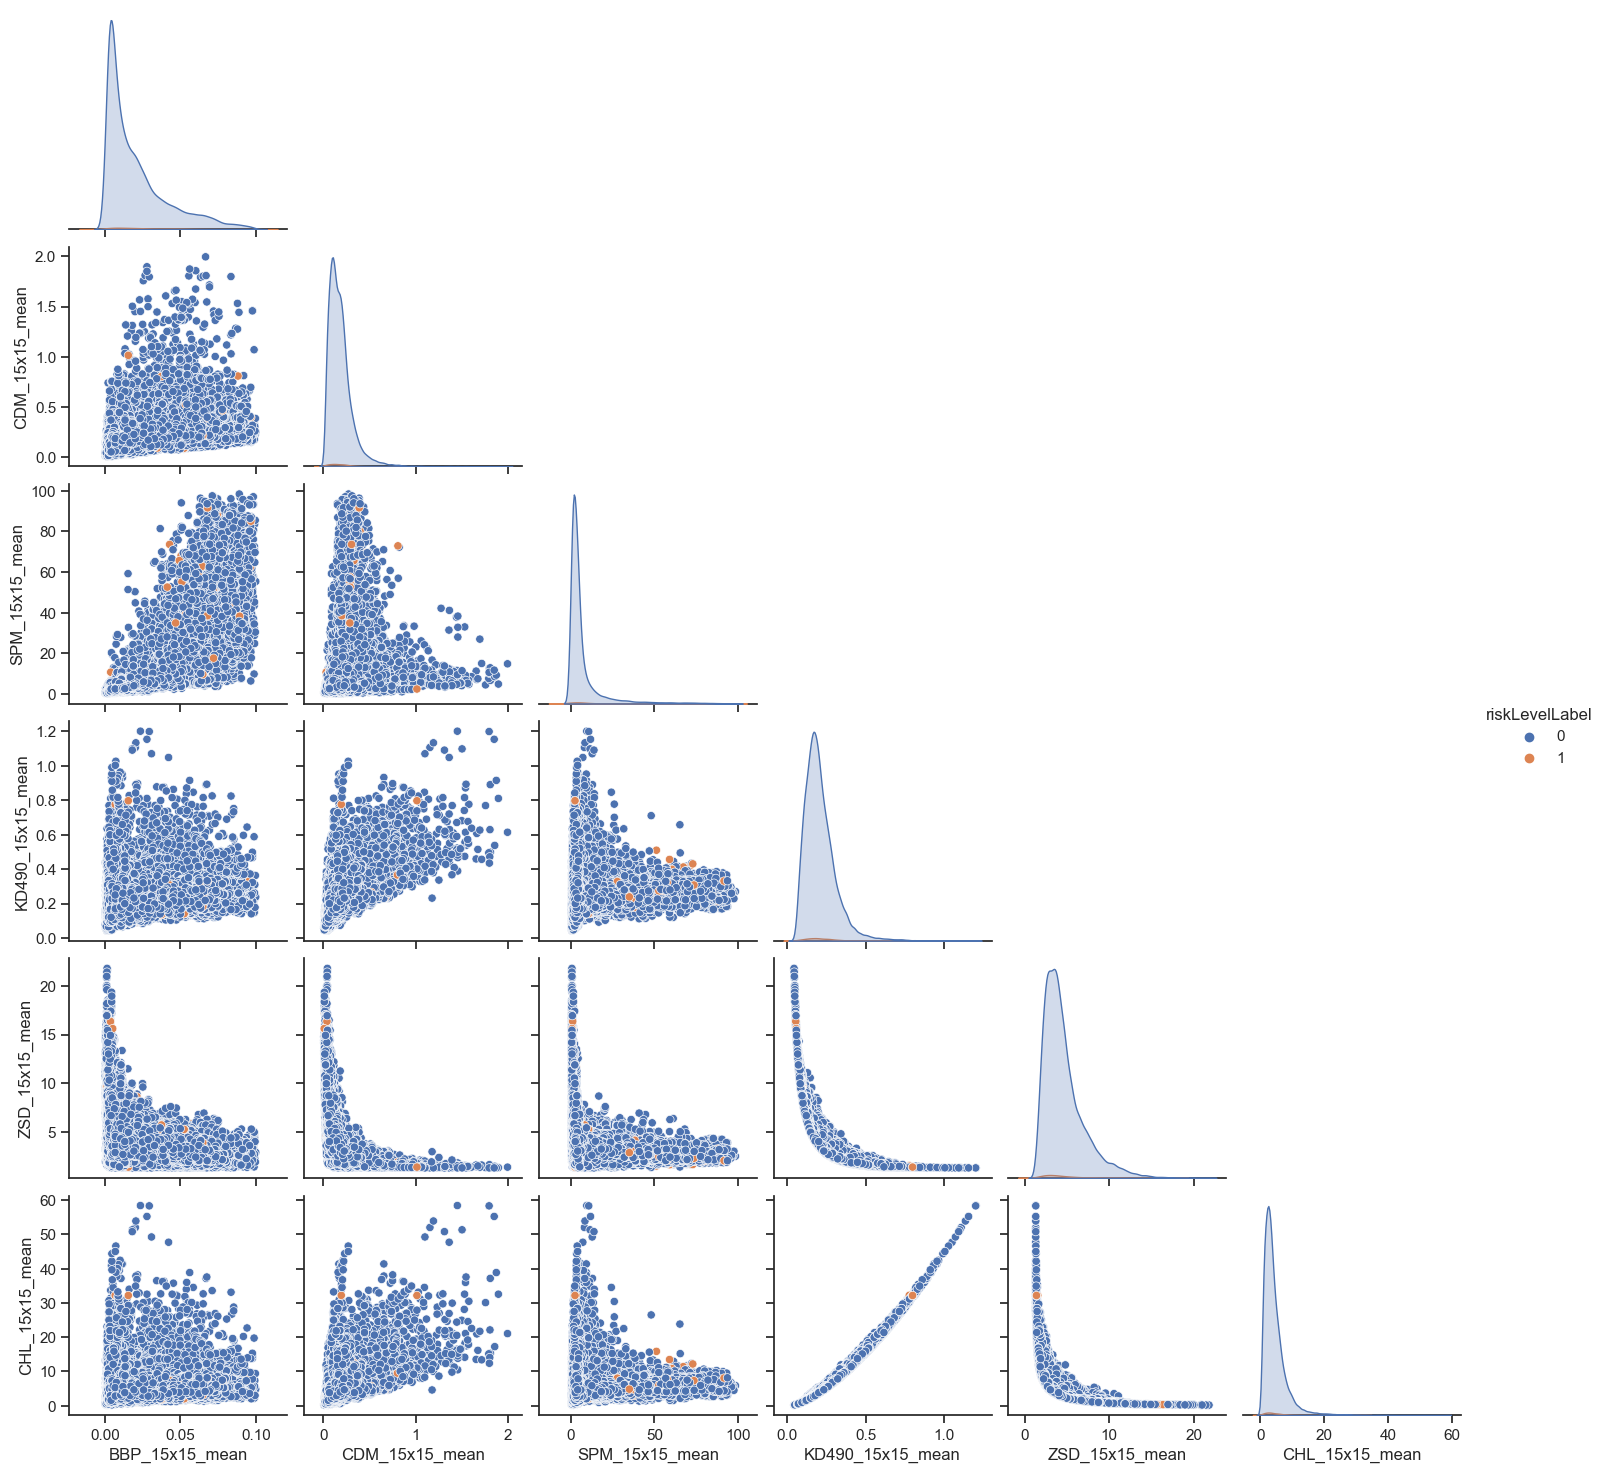

In [38]:
corr_columns_neg = ['riskLevelLabel'] + [col for col in df.columns if col.endswith('15x15_mean')]
subset_df = df[corr_columns_neg].dropna()

sns.set(style='ticks')
sns.pairplot(subset_df, hue='riskLevelLabel', corner=True)

plt.show()

#### Feature Dataset filled with Neg

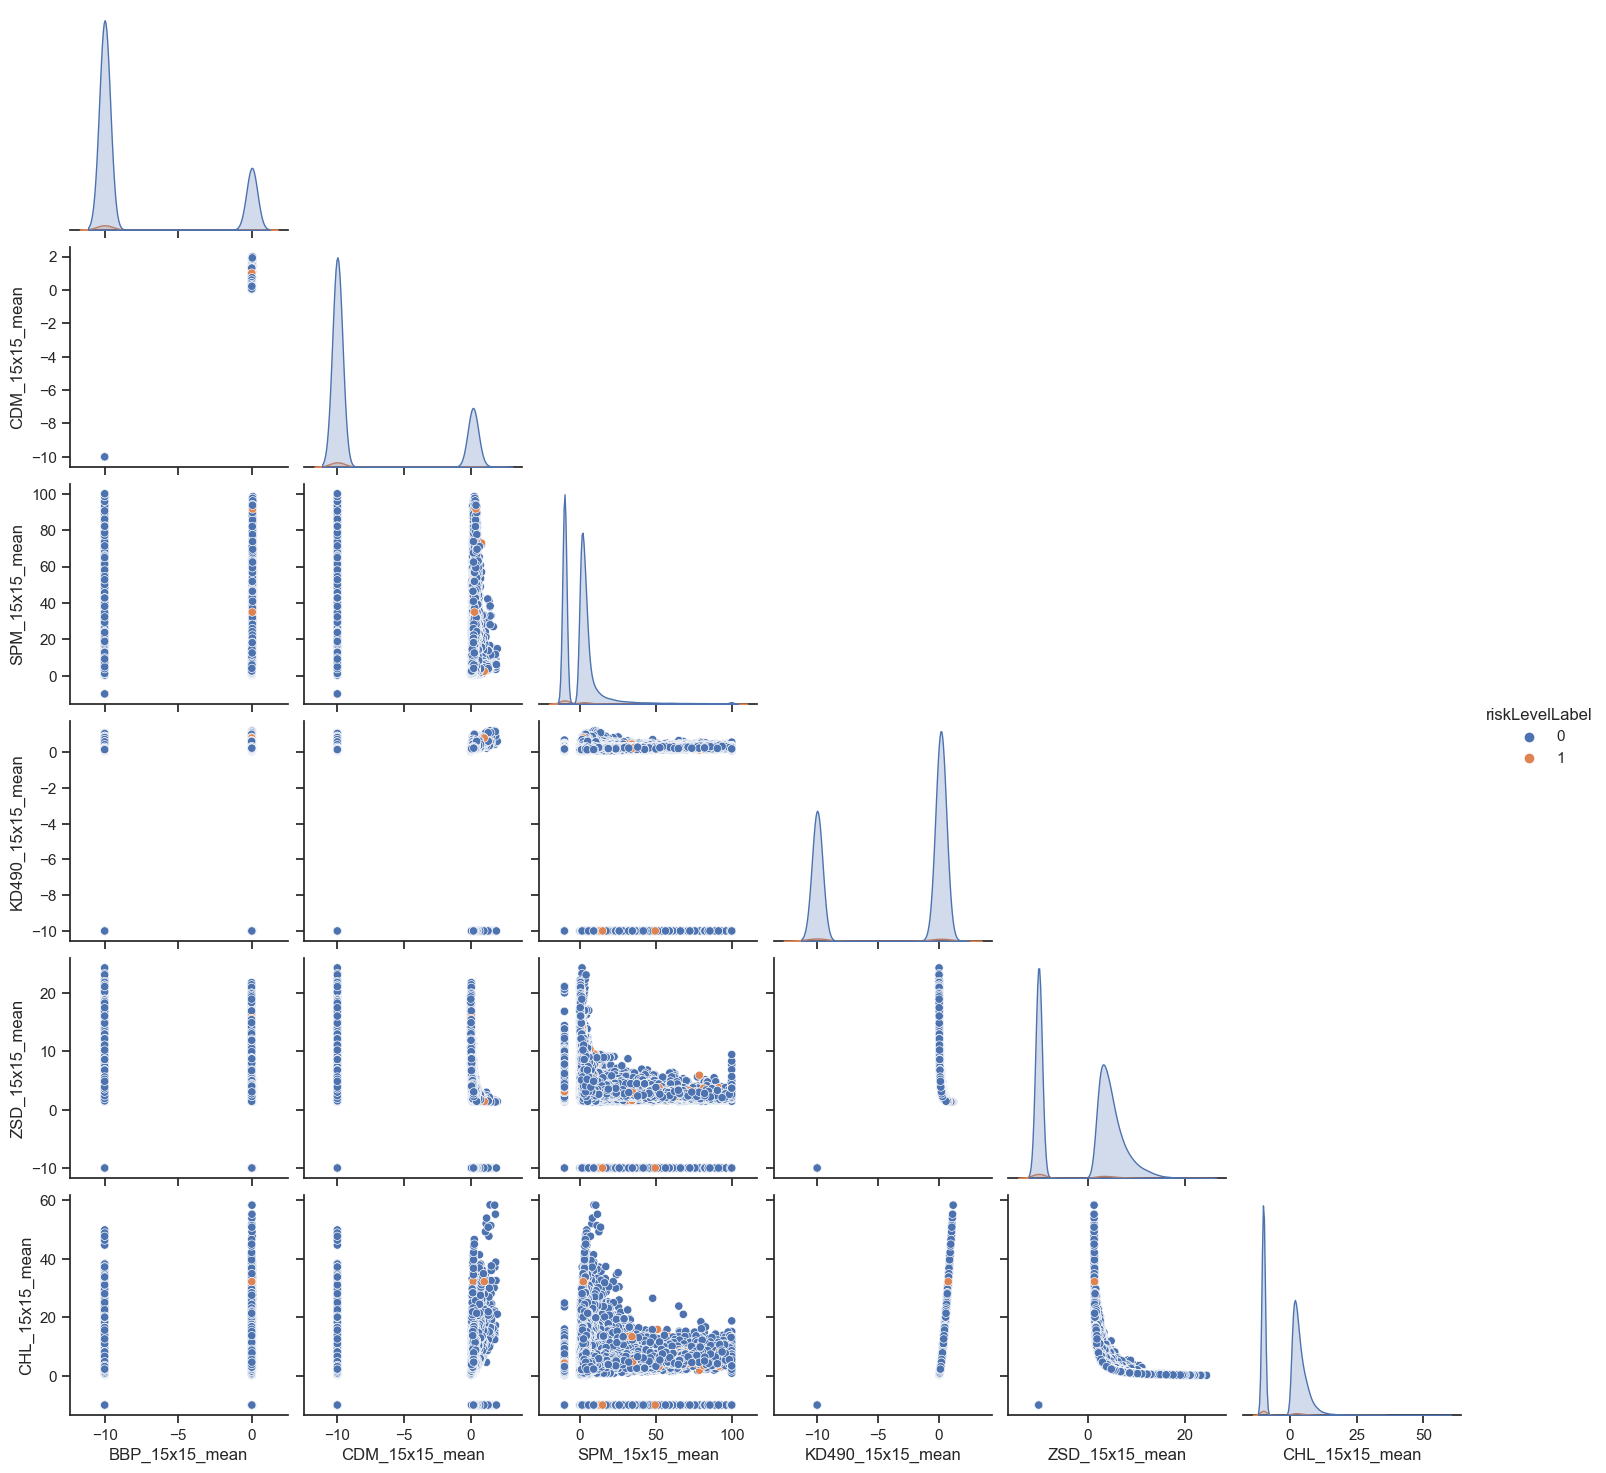

In [25]:
corr_columns_neg = ['riskLevelLabel'] + [col for col in df_neg.columns if col.endswith('15x15_mean')]
subset_df_neg = df_neg[corr_columns_neg].dropna()

sns.set(style='ticks')
sns.pairplot(subset_df_neg, hue='riskLevelLabel', corner=True)

plt.show()

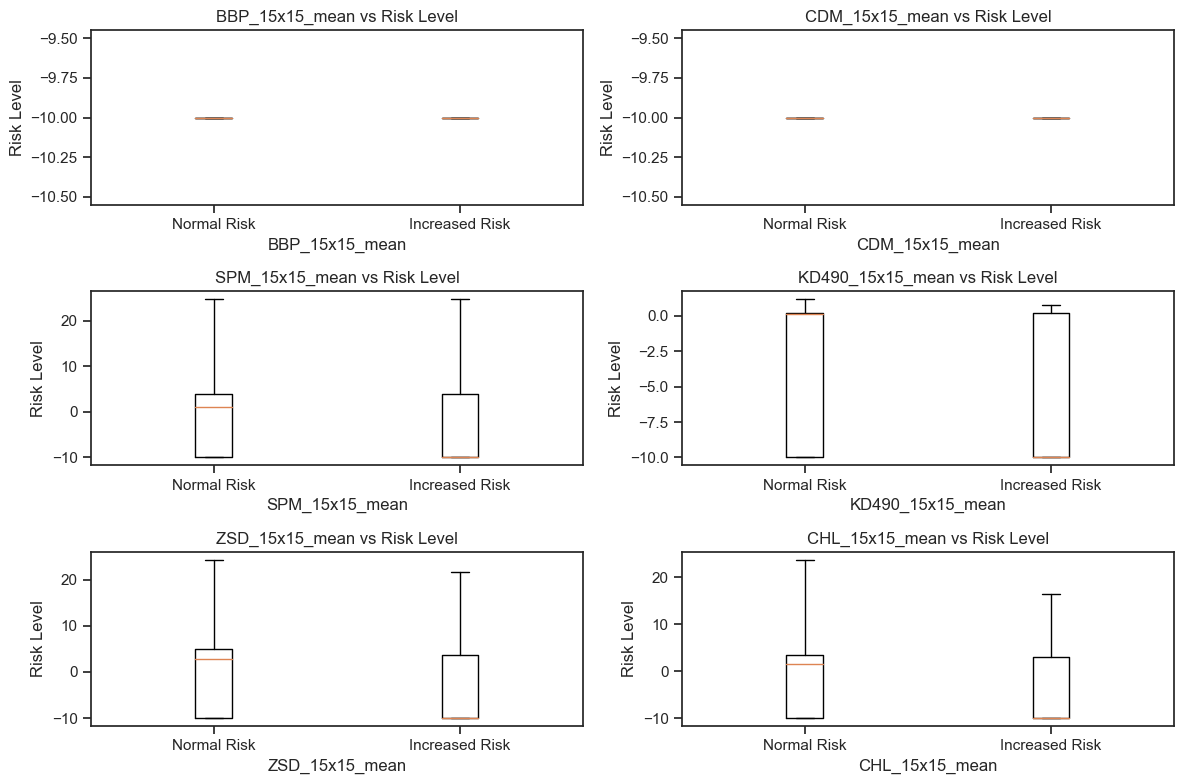

In [22]:
labels = [x for x in df_neg.columns if '15x15_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    ax.boxplot([df_neg.loc[df_neg["riskLevelLabel"] == 0, labels[i]].dropna(),
                df_neg.loc[df_neg["riskLevelLabel"] == 1, labels[i]].dropna()],
               labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()

#### Feature Dataset filled with Zero

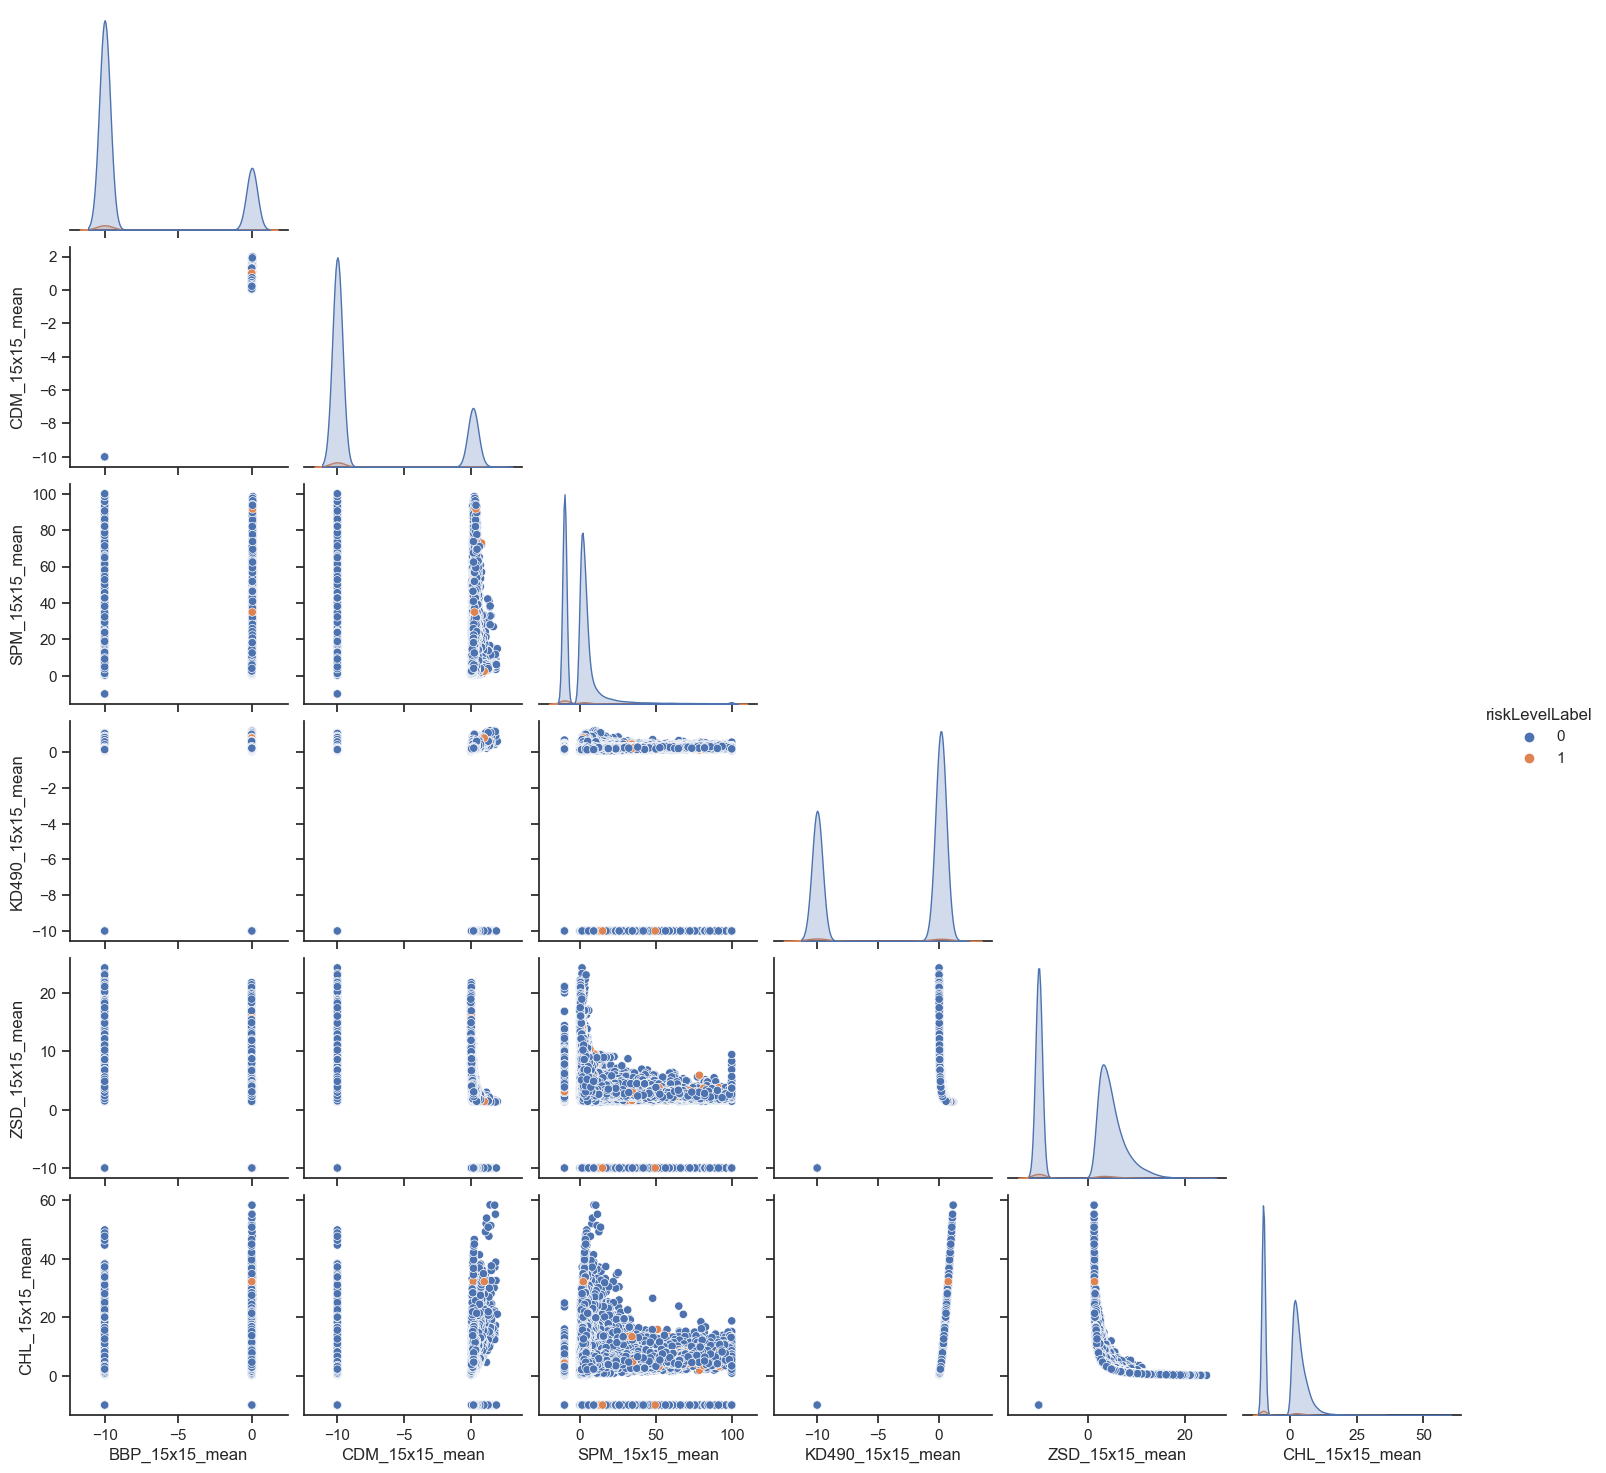

In [23]:
corr_columns_zero = ['riskLevelLabel'] + [col for col in df_zero.columns if col.endswith('15x15_mean')]
subset_df_zero = df_zero[corr_columns_zero].dropna()

sns.set(style='ticks')
sns.pairplot(subset_df_neg, hue='riskLevelLabel', corner=True)

plt.show()

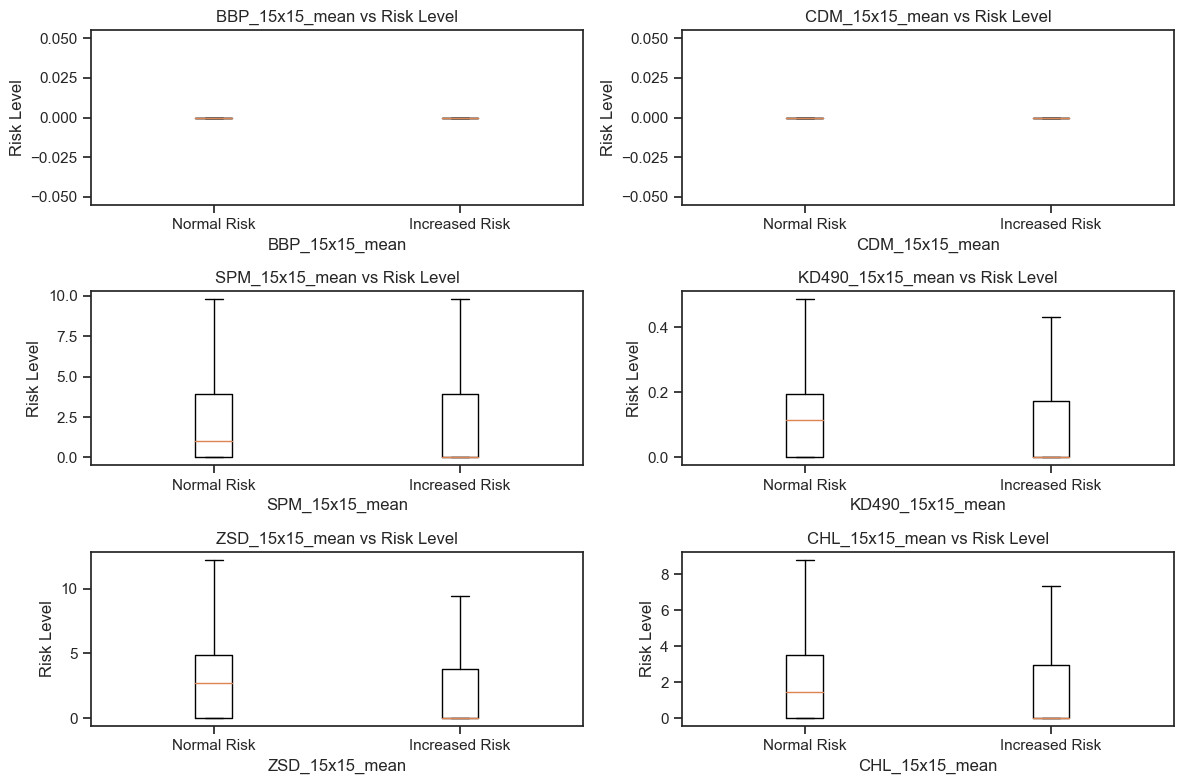

In [24]:
labels = [x for x in df_zero.columns if '15x15_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    ax.boxplot([df_zero.loc[df_zero["riskLevelLabel"] == 0, labels[i]].dropna(),
                df_zero.loc[df_zero["riskLevelLabel"] == 1, labels[i]].dropna()],
               labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()